In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
global dff


In [561]:
 def readData():   
    import numpy as np
   
    data = pd.read_csv('WindramTrainingData.csv', index_col = [0])
    df = pd.DataFrame(data)
    colsums = df.sum(axis=0)
    #print(colsums.shape)
    normalized = df.div(colsums)
    #print(array, "_", colsums)
    print(normalized.shape)
    data1 = normalized
    #data1 = np.transpose(normalized)
    return data1



In [633]:
data1 = readData()
print(data1.head)

(20214, 90)
<bound method NDFrame.head of           Oocyte..1.RPKM.  Oocyte..2.RPKM.  Oocyte..3.RPKM.  Zygote..1.RPKM.  \
C9orf152         0.000000         0.000000         0.000000         0.000000   
RPS11            0.000295         0.000280         0.000275         0.000257   
ELMO2            0.000086         0.000104         0.000094         0.000151   
CREB3L1          0.000029         0.000036         0.000043         0.000039   
PNMA1            0.000021         0.000034         0.000046         0.000072   
...                   ...              ...              ...              ...   
PIK3IP1          0.000000         0.000007         0.000000         0.000004   
SNRPD2           0.000171         0.000155         0.000152         0.000130   
SLC39A6          0.000128         0.000159         0.000157         0.000152   
CTSC             0.000144         0.000140         0.000140         0.000097   
AQP7             0.000000         0.000000         0.000000         0.000000  

In [521]:
def rank(data):
    data2 = np.transpose(data)
    data3 = data2.rank(axis=0, method='average', numeric_only=None, na_option='keep', ascending=True, pct=False)
    #print(data3.iloc[0:1,8])
    #data3 +=1
    return data3

In [634]:
data_ranked = rank(data1)
print(data_ranked) # 1 less than the pseudoGA for all

                                  C9orf152  RPS11  ELMO2  CREB3L1  PNMA1  \
Oocyte..1.RPKM.                       43.5    8.0   48.0     67.0   10.0   
Oocyte..2.RPKM.                       43.5    5.0   58.0     71.0   15.0   
Oocyte..3.RPKM.                       43.5    4.0   52.0     76.0   17.0   
Zygote..1.RPKM.                       43.5    2.0   71.0     73.0   31.0   
Zygote..2.RPKM.                       43.5    3.0   78.0     68.0   24.0   
...                                    ...    ...    ...      ...    ...   
Late.blastocyst..3..Cell.4.RPKM.      43.5   86.0    8.0     28.5   59.0   
Late.blastocyst..3..Cell.5.RPKM.      43.5   71.0   17.0     89.0   81.0   
Late.blastocyst..3..Cell.6.RPKM.      43.5   88.0    8.0     28.5    5.0   
Late.blastocyst..3..Cell.7.RPKM.      43.5   77.0    8.0     28.5    7.0   
Late.blastocyst..3..Cell.8.RPKM.      43.5   84.0   27.0     90.0   40.0   

                                  MMP2  TMEM216  LOC653712  C10orf90  ZHX3  \
Oocyte..1

In [635]:
    print(data_ranked.shape)
    squared = np.square(data_ranked)
    sumsqr = squared.sum(axis = 0)
    #print(squared, "_", sumsqr)
    colMeans = np.mean(data_ranked, axis = 0)
    sqrsum = np.square(colMeans)
    print(sqrsum)
    print(sumsqr)

(90, 20214)
C9orf152    2070.25
RPS11       2070.25
ELMO2       2070.25
CREB3L1     2070.25
PNMA1       2070.25
             ...   
PIK3IP1     2070.25
SNRPD2      2070.25
SLC39A6     2070.25
CTSC        2070.25
AQP7        2070.25
Length: 20214, dtype: float64
C9orf152    194067.5
RPS11       247065.0
ELMO2       246785.0
CREB3L1     232435.0
PNMA1       247063.0
              ...   
PIK3IP1     231637.0
SNRPD2      247065.0
SLC39A6     247055.0
CTSC        247065.0
AQP7        195895.0
Length: 20214, dtype: float64


In [636]:
#sumsqr_df = pd.DataFrame(sumsqr)
sqrsum_df = pd.DataFrame(sqrsum)

cellNumber = len(data_ranked)
sqrsum_df *=cellNumber
#print(sqrsum_df)

ntest = 50
#print(ntest)

sumsqr_new = pd.DataFrame()
sqrsum_new = pd.DataFrame()

for i in range(int(8*ntest)):
    sumsqr_new = pd.concat([sumsqr_new,sumsqr], axis = 1)
print(sumsqr_new)

for i in range(int(8*ntest)):
    sqrsum_new = pd.concat([sqrsum_new,sqrsum_df], axis = 1)
print(sqrsum_new)

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

In [56]:
def initialize(data, ntest):
    n = data.shape[0]
    array1 = np.arange(1, n+1, 1)
    array2 = np.arange(1, (2*ntest)+1, 1)
    dfIni = pd.DataFrame(columns = array1, index = array2)
    #print(array1)
    
    for i in range(1, (2*ntest)+1):
        #print(random.sample(range(1, n+1),n))
        dfIni.loc[i] = random.sample(range(1, n+1),n)
        #print(dfIni)
    return dfIni

In [639]:
# import random 
# ntest = 50
# print(data_ranked.shape[0])
# Individual = initialize(data_ranked,ntest)

#print(Individual.head)
for i in range(1,len(Individual)+1):
    test1 = np.unique(list(Individual.loc[i])).size == len(list(Individual.loc[i]))
    print(list(Individual.loc[i]))
    if test1 != True:
        print("^^^^^^^^^^^^^^", "not Unique")
#     if test2 != True:
#         print("^^^^^^^^^^^^^^", "not Uniquue")
# import numpy as np
# for i in range(1, len(Individual)+1):
#     x = np.array(Individual.loc[i])
#     if len(x) > len(set(x)):
#         print(i, "i")
#         print("false")

[37, 61, 26, 3, 85, 11, 16, 82, 66, 84, 49, 50, 79, 47, 59, 63, 54, 24, 74, 5, 38, 70, 42, 52, 87, 27, 51, 18, 57, 72, 12, 29, 10, 80, 9, 19, 13, 21, 31, 14, 2, 6, 88, 7, 81, 20, 77, 33, 73, 45, 23, 35, 48, 76, 65, 34, 40, 4, 15, 53, 39, 17, 78, 64, 83, 89, 44, 30, 67, 58, 43, 41, 71, 75, 25, 36, 69, 8, 56, 86, 28, 46, 32, 60, 22, 90, 55, 62, 68, 1]
[26, 14, 87, 59, 61, 63, 77, 43, 41, 66, 27, 82, 57, 20, 69, 52, 13, 51, 39, 86, 65, 79, 32, 84, 25, 88, 75, 11, 76, 6, 71, 22, 67, 2, 81, 74, 21, 18, 55, 36, 90, 50, 33, 44, 58, 70, 9, 5, 30, 10, 56, 78, 60, 83, 68, 29, 4, 48, 47, 45, 1, 38, 46, 80, 40, 34, 24, 19, 64, 7, 23, 12, 15, 89, 28, 31, 53, 35, 54, 37, 17, 8, 16, 3, 62, 49, 72, 42, 85, 73]
[10, 1, 8, 58, 14, 37, 63, 20, 41, 21, 49, 47, 59, 16, 71, 12, 31, 19, 79, 84, 39, 73, 62, 29, 80, 70, 35, 85, 26, 46, 64, 55, 66, 50, 67, 89, 11, 34, 13, 7, 56, 68, 9, 15, 24, 75, 4, 65, 25, 42, 51, 81, 6, 27, 72, 17, 82, 53, 77, 87, 74, 2, 23, 30, 48, 38, 22, 88, 60, 57, 40, 86, 44, 90, 3, 32,

In [640]:
iter = 1
mininit = 30
costmat = pd.DataFrame(0, index=np.arange(mininit), columns=np.arange(8*ntest))
#print(costmat)

In [672]:
def crossover(p1, p2):
    print(p1,p2)
    print("p1p2")
    import math
    from numpy import nan
    from scipy import stats
    
    u = np.random.poisson(1, 1)
    if u == 0:
        u = 1
        p2 = p2.iloc[::-1]
#     corr = stats.pearsonr(p1, p2)
#     if corr < 0:
#         p2 = p2.iloc[::-1]
        
    c1, c2 = p1.copy(), p2.copy()
    c11 = pd.DataFrame()
    c22 = pd.DataFrame()
    length = len(p1)
    #print(length)
    
    pt = random.randint(1,  int(length/2))
    #pt = int(length/2)
    #print(pt)
    
    
    print(c1, "c1c2")
    print(type(c1))
    print(c1[1])
    print(c1[1:3])
    if u%2 == 1:
        c1[0:pt] = p1.iloc[0:pt]
        c2[(pt):length] = p2.iloc[(pt):length]
        c11 = p1.iloc[0:pt]
        c22 = p2.iloc[(pt):length]
    else:
        c2[0:pt] = p2.iloc[0:pt]  
        c1[(pt):length] = p1.iloc[(pt):length]
        c22 = p2.iloc[0:pt] 
        c11 = p1.iloc[(pt):length]
        
    
    setp1 = list(p1)
    setp2 = list(p2)
    setc1 = set(c11)
    setc2 = set(c22)
    
    #print("-----------------")
    
#     print(list(p1))
#     print(list(p2))
#     print(setc1)
#     print(c22)
    
    setnotinC1 = [x for x in setp1 if x not in setc1]
    setnotinC2 = [x for x in setp2 if x not in setc2]
    
    #setnotinC1 = setp1.difference(setc1)
    #setnotinC2 = setp2.difference(setc2)
    
    #print("=============")
    #print(setnotinC1)
#     print(setnotinC2)
    
    list_notInC1 = list(setnotinC1)
    list_notInC2 = list(setnotinC2)
    
    list_p1 = list(p1)
    list_p2 = list(p2)
    
    positWithinC1 = [list_p1.index(x)+1 if x in list_p1 else None for x in list_notInC1] 
    positOutC1 = [list_p2.index(x)+1 if x in list_p2 else None for x in list_notInC1] 
    
#     print(positWithinC1)
#     print(positOutC1)
   
    positWithinC2 = [list_p2.index(x)+1 if x in list_p2 else None for x in list_notInC2] 
    positOutC2 = [list_p1.index(x)+1 if x in list_p1 else None for x in list_notInC2 ]
    
    print(positOutC1)
    print(positOutC2)
    
    positOutC2 = [x for x in positOutC2 if x is not None]
    positOutC1 = [x for x in positOutC1 if x is not None]
    
    print(positOutC1)
    print(positOutC2)
    
    positOutC2_O = order_2(positOutC2)
    positOutC1_O = order_2(positOutC1)
    
    
    positOutC2_O = list(np.asarray(positOutC2_O) + 1)
    positOutC1_O = list(np.asarray(positOutC1_O) + 1)
    
#     print(positOutC1_O)
#     print(positOutC2_O)
    
    
    set1 = list(positWithinC1)
    set2 = list(positOutC1_O)
    
#     print(">>>>>>>>")
#     print(set1)
#     print(set2)
#     print(setnotinC1)
    #import numpy as np
    #for i in range(1, len(positOutC1_O)+1):
#     x = np.array(positOutC1_O)
#     if len(x) > len(set(x)):
#         #print(i, "i")
#         print("false")
            
    for i, j in zip(set1, set2):
        #print(i-1, j-1, "XXXX")
        if i == 1:
            c1[i] = setnotinC1[j-1]
#         else:
#             c1[i-1] = setnotinC1[j-1]
    
    set1 = set(positWithinC2)
    set2 = set(positOutC2_O)  
    
    for i, j in zip(set1, set2):
        #print(i-1, j-1, "XXXX")
        if i == 1:
            c2[i] = setnotinC2[j-1]
#         else:
#             c2[i-1] = setnotinC2[j-1]
      
    #print(list(c1))
#     print(list(c2))
        
    #print(c1)
    #c2[positWithinC2.sort()] = p1[positOutC2_O]
#     if u%2 == 1:
#         c1[0:pt] = p1.iloc[0:pt]
#         c2[pt:length] = p2.iloc[pt:length]
#     else:
#         c2[0:pt] = p2.iloc[0:pt] 
#         c1[pt:length] = p1.iloc[pt:length]
    listc1 =list(c1)
    listc2 =list(c2)
    listc1.sort()
    listc2.sort()
    print(listc1)
    print(listc2)
    test1 = np.unique(list(c1)).size == len(list(c1))
    test2 = np.unique(list(c2)).size == len(list(c2))
    if test1 != True:
        print("^^^^^^^^^^^^^^", "not Unique")
    if test2 != True:
        print("^^^^^^^^^^^^^^", "not Uniquue")
    df = pd.DataFrame()
    df = df.append(c1)
    df = df.append(c2)
    #print(df)
    return df


In [627]:
import numpy as np
x = [1, 1, 1, 2, 3, 4, 5, 6, 2]
test1 = np.unique(x).size == len(x)
if test1 != True:
    print("CCC")

CCC


In [642]:
def recombination(X1):
    test = X1.isnull().values.any()
    #print(test)
    
    N = X1.shape[0]
    n = X1.shape[1]
    #print(N)
    samp = random.sample(range(1,N+1),int(N/2))
    samp = set(samp)
    all = np.arange(1,N+1)
    all = set(all)
    #print(X1.loc[samp,])
    X2 = X1.loc[samp,]
    #print("X2")
    #print(X2)
    X3 = X1.loc[all.difference(samp),]
    #print(X3)
    C1 = pd.DataFrame()
    O_samp =all.difference(samp)
    
    #print(O_samp, samp)
    check = X2.isnull().values.any()
    check1 = X3.isnull().values.any()
    #print(check, check1, "before Crossover")
    for i, j in zip(samp,O_samp):
        #print(X2.loc[i], X3.loc[j])
        
        print(">>>>>>>")
        
        check = X2.loc[i].isnull().values.any()
        check1 = X3.loc[j].isnull().values.any()
        #print(check, check1)
#         if check:
#             C11 = crossover(X2.loc[i+1], X3.loc[j])
#         if check1:
#             C11 = crossover(X2.loc[i], X3.loc[j+1])
        
        C11 = crossover(X2.loc[i], X3.loc[j])
#         print(X2.loc[i])
#         print(X3.loc[j])
#         print(i,j)
        print("<<<<<<")
        #C11 = crossover(X2.loc[i], X3.loc[j])
        
        l = list(samp)
        if i== l[0]:
            C1 = C11
            #C1.append(C22)
        else:
            C1 = C1.append(C11)
            #C1.append(C22)
        
    return C1.sort_index(axis = 0)
    #X<-t(apply(cbind(X2,X3),1,"recomb"))
    #return(rbind(X[,(1:N)],X[,((N+1):(2*N))]))


In [674]:
# test = list(Individual.loc[1])
# print(test)
# print(list(c1.loc[1]))
# print(list(c1.loc[2]))
c1 = recombination(Individual)
# test1 = np.unique(list(c1.loc[1])).size == len(list(c1.loc[1]))
# test2 = np.unique(list(c1.loc[2])).size == len(list(c1.loc[2]))
# print(test1, test2)

>>>>>>>
1     37
2     61
3     26
4      3
5     85
      ..
86    90
87    55
88    62
89    68
90     1
Name: 1, Length: 90, dtype: int64 1     26
2     14
3     87
4     59
5     61
      ..
86    49
87    72
88    42
89    85
90    73
Name: 2, Length: 90, dtype: int64
p1p2
1     37
2     61
3     26
4      3
5     85
      ..
86    90
87    55
88    62
89    68
90     1
Name: 1, Length: 90, dtype: int64 c1c2
<class 'pandas.core.series.Series'>
37
2    61
3    26
Name: 1, dtype: int64
[90, 7, 2, 63, 8, 79, 81, 67, 5, 49, 69, 32, 87, 85, 12, 24, 55, 43, 29, 45, 3, 75, 88, 80, 73, 53, 78, 4, 19, 35, 41, 27, 44, 23, 74, 54, 15, 89, 57, 61, 65, 21, 56, 77, 84, 48, 1, 31, 20, 13, 33, 62, 70, 25, 26, 34, 18, 14, 72, 10, 39, 22, 37, 17, 47, 42, 58, 46, 83, 82, 60, 64, 66, 51, 76, 9, 40, 71, 16, 28, 68, 38, 59, 50, 52, 6, 36, 30]
[49, 5]
[90, 7, 2, 63, 8, 79, 81, 67, 5, 49, 69, 32, 87, 85, 12, 24, 55, 43, 29, 45, 3, 75, 88, 80, 73, 53, 78, 4, 19, 35, 41, 27, 44, 23, 74, 54, 15, 89, 57, 61,

<<<<<<
>>>>>>>
1     80
2     90
3     58
4     24
5     13
      ..
86    31
87    52
88    32
89     6
90    17
Name: 41, Length: 90, dtype: int64 1     69
2     25
3      9
4     74
5      2
      ..
86    34
87    15
88    39
89    20
90    37
Name: 38, Length: 90, dtype: int64
p1p2
1     80
2     90
3     58
4     24
5     13
      ..
86    31
87    52
88    32
89     6
90    17
Name: 41, Length: 90, dtype: int64 c1c2
<class 'pandas.core.series.Series'>
80
2    90
3    58
Name: 41, dtype: int64
[55, 74, 11, 73, 50, 38, 39, 27, 48, 90, 34, 81, 62, 47, 40, 85, 3, 4, 37, 79, 7, 32, 59, 36, 19, 42, 64, 71, 82, 84, 58, 43, 12, 68, 57, 31, 15]
[6, 7, 15, 79, 26, 32, 44, 52, 54, 14, 9, 89, 5, 82, 49, 83, 86, 1, 57, 35, 31, 23, 42, 46, 13, 43, 27, 67, 69, 72, 34, 39, 47, 28, 48, 4, 2, 63, 75, 59, 40, 20, 60, 12, 29, 62, 30, 16, 70, 53, 38, 80, 10]
[55, 74, 11, 73, 50, 38, 39, 27, 48, 90, 34, 81, 62, 47, 40, 85, 3, 4, 37, 79, 7, 32, 59, 36, 19, 42, 64, 71, 82, 84, 58, 43, 12, 68, 57, 31, 1

<<<<<<
>>>>>>>
1     12
2     63
3     73
4     75
5     70
      ..
86    69
87    82
88    66
89     2
90    28
Name: 77, Length: 90, dtype: int64 1     76
2     69
3     60
4     37
5     17
      ..
86     9
87    15
88    77
89    23
90    68
Name: 81, Length: 90, dtype: int64
p1p2
1     12
2     63
3     73
4     75
5     70
      ..
86    69
87    82
88    66
89     2
90    28
Name: 77, Length: 90, dtype: int64 c1c2
<class 'pandas.core.series.Series'>
12
2    63
3    73
Name: 77, dtype: int64
[15, 13, 67, 38, 62, 29, 55, 40, 68, 76, 45, 3, 24, 37, 36, 19, 71, 11, 88, 69, 49, 42, 51, 81, 72, 73, 20, 14, 50, 31, 7, 48, 89, 56, 77, 59, 86, 4, 18, 32, 63, 25, 57, 30, 54, 87, 44, 1, 35, 53, 90, 46, 60, 21, 83, 41, 75, 27, 39, 58, 28, 23, 61, 78, 70, 12, 26, 84, 9, 79, 10, 66, 2, 34, 43, 82, 22]
[61, 86, 25, 51, 6, 4, 44, 8, 82, 84, 31, 79, 15]
[15, 13, 67, 38, 62, 29, 55, 40, 68, 76, 45, 3, 24, 37, 36, 19, 71, 11, 88, 69, 49, 42, 51, 81, 72, 73, 20, 14, 50, 31, 7, 48, 89, 56, 77, 59,

In [403]:
def mutation(DataForMutation):
    N_rows = DataForMutation.shape[0]
    n_columns = DataForMutation.shape[1]
    
    
    for i in range(N_rows):
        samp = random.sample(range(0, n_columns),2)
        u1 = min(samp)
        u2 = max(samp)
        #print(u1, u2)
        #print(DataForMutation)
        previous = DataForMutation.iloc[i,u1:u2]
        new = previous.iloc[::-1]
        #print(type(new))
        #print(new)
        #print(DataForMutation.iloc[i,u1:u2])
        DataForMutation.iloc[i,u1:u2] = list(new)

    return(DataForMutation)
    

In [675]:
forMutation = pd.DataFrame();
forMutation = pd.concat([c1,Individual], ignore_index=True)
#print(forMutation)
#forMutation = forMutation.concat(Individual)
arrayMM = mutation(forMutation)
print(arrayMM.head)

<bound method NDFrame.head of        1     2     3     4     5     6     7     8     9     10  ...    81  \
0    37.0  61.0  26.0   3.0  85.0  11.0  16.0  82.0  66.0  84.0  ...  28.0   
1    73.0  14.0  87.0  59.0  61.0  63.0  77.0  43.0  41.0  66.0  ...  17.0   
2    10.0   1.0  73.0  39.0  84.0  79.0  19.0  31.0  12.0  71.0  ...  76.0   
3    62.0  39.0  31.0  23.0  86.0  20.0  11.0  76.0   1.0  49.0  ...   3.0   
4    13.0  58.0  66.0  89.0  36.0  79.0  49.0  75.0  76.0  90.0  ...  65.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
195   5.0  25.0  64.0  87.0   8.0  70.0  18.0  47.0  45.0  69.0  ...  19.0   
196   3.0  86.0   2.0  23.0  28.0  26.0  53.0  84.0  79.0  58.0  ...  24.0   
197  33.0  52.0  25.0  23.0   3.0  83.0  89.0  60.0  74.0  57.0  ...  17.0   
198  65.0  28.0  16.0  72.0   5.0  47.0  46.0  85.0   1.0  90.0  ...  80.0   
199  32.0  58.0   4.0  68.0  38.0  35.0  87.0  67.0  70.0  47.0  ...  21.0   

       82    83    84    85    86

In [676]:
forCost = pd.DataFrame();
forCost = pd.concat([arrayMM,forMutation], ignore_index=True)
# forCost = forCost.append(arrayMM)
# forCost = forCost.append(forMutation)
print(forCost.loc[0])
index = np.array(range(1,len(forCost)+1));
#print(index)
#forCost.set_index(index)

1     37.0
2     61.0
3     26.0
4      3.0
5     85.0
      ... 
86    90.0
87    55.0
88    62.0
89    68.0
90     1.0
Name: 0, Length: 90, dtype: float64


In [376]:
def order(data):
    for i in range(len(data)):
        d = np.array(data.loc[i])
        sort_index = np.argsort(d)
        listed = list(sort_index)
        data.loc[i] = listed
        #print(data)
    return data

In [677]:
#print(type(data3))
#print(forCost)
orderedData = order(forCost)
trasposed = np.transpose(orderedData)
# print(forCost.shape)
print(trasposed)

     0     1     2     3     4     5     6     7     8     9    ...   390  \
1   89.0  54.0   1.0   8.0  24.0  23.0  34.0  21.0  33.0  87.0  ...   3.0   
2   39.0  33.0  61.0  75.0  62.0  64.0  17.0  82.0  73.0  46.0  ...  51.0   
3    3.0  83.0  74.0  80.0  16.0  22.0  78.0  10.0  43.0  68.0  ...  77.0   
4   22.0  58.0  46.0  14.0  56.0  30.0  87.0  42.0  17.0   9.0  ...  68.0   
5   60.0  47.0  81.0  61.0  60.0  53.0  37.0   3.0  34.0  42.0  ...  22.0   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
86  79.0  19.0  71.0   4.0  41.0  65.0  65.0  53.0  22.0  36.0  ...  57.0   
87  55.0   2.0  59.0  52.0  59.0  26.0  38.0  55.0  36.0  47.0  ...  66.0   
88  37.0  25.0  67.0  72.0  84.0  75.0  66.0  36.0  46.0  63.0  ...  23.0   
89  65.0  73.0  35.0  39.0   3.0   2.0   9.0   1.0  15.0  35.0  ...  38.0   
90  85.0  40.0  73.0  15.0   9.0  36.0  47.0  38.0  68.0  74.0  ...  62.0   

     391   392   393   394   395   396   397   398   399  
1   27.0  13.0  

In [378]:
from sklearn.linear_model import LinearRegression

In [379]:
def linear1(data):
    from sklearn.linear_model import LinearRegression
    
    row = data.shape[0]
    x = np.array(range(1, row+1)).reshape((-1, 1))
    y = np.square(x)
   
    
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    
    y_pred = model.predict(x)
    absError = y_pred - y
    absError *= -1
    #print(absError)
    
    SE = np.square(absError) # squared errors
    SumSE = sum(SE)
    RSum_SE = np.sqrt(SumSE)
    basis1 = absError/ RSum_SE
    
    print(basis1)
    
    
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    return basis1

In [678]:
#print(data_ranked.shape[1])
basis1 = linear1(data_ranked)

coefficient of determination: 0.93881083205478
intercept: [-1395.33333333]
slope: [[91.]]
[[ 0.22797408]
 [ 0.21260504]
 [ 0.1975853 ]
 [ 0.18291485]
 [ 0.1685937 ]
 [ 0.15462185]
 [ 0.14099929]
 [ 0.12772603]
 [ 0.11480207]
 [ 0.1022274 ]
 [ 0.09000203]
 [ 0.07812595]
 [ 0.06659917]
 [ 0.05542169]
 [ 0.0445935 ]
 [ 0.03411461]
 [ 0.02398502]
 [ 0.01420472]
 [ 0.00477372]
 [-0.00430799]
 [-0.0130404 ]
 [-0.02142351]
 [-0.02945733]
 [-0.03714184]
 [-0.04447707]
 [-0.051463  ]
 [-0.05809963]
 [-0.06438696]
 [-0.070325  ]
 [-0.07591374]
 [-0.08115318]
 [-0.08604333]
 [-0.09058419]
 [-0.09477574]
 [-0.098618  ]
 [-0.10211097]
 [-0.10525463]
 [-0.108049  ]
 [-0.11049408]
 [-0.11258986]
 [-0.11433634]
 [-0.11573352]
 [-0.11678141]
 [-0.11748   ]
 [-0.1178293 ]
 [-0.1178293 ]
 [-0.11748   ]
 [-0.11678141]
 [-0.11573352]
 [-0.11433634]
 [-0.11258986]
 [-0.11049408]
 [-0.108049  ]
 [-0.10525463]
 [-0.10211097]
 [-0.098618  ]
 [-0.09477574]
 [-0.09058419]
 [-0.08604333]
 [-0.08115318]
 [-0.07591

In [380]:
def linear2(data):
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    row = data.shape[0]
    #print(row)
    x = np.array(range(1, row+1)).reshape((-1, 1))
    y = np.power(x,3)
    
    transformer = PolynomialFeatures(degree=2, include_bias=False)
    transformer.fit(x)
    x_ = transformer.transform(x)
    x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
    #print(x_)
    
    model = LinearRegression().fit(x_, y)
    r_sq = model.score(x_, y)
    
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    
    y_pred = model.predict(x_)
    absError = y_pred - y
    absError *= -1
    
    SE = np.square(absError) # squared errors
    SumSE = sum(SE)
    RSum_SE = np.sqrt(SumSE)
    basis2 = absError/ RSum_SE
    
    #print(basis1)
    
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    return basis2

In [613]:
def linear11(cellNumber):
    x = np.array(range(1,cellNumber+1))
    mean = np.mean(x)
    #x1<-1:n
    basis11 = (x-np.mean(x))/np.sqrt(np.sum(np.square(x-np.mean(x))))
    #expls11<-apply(t(XX),1,"perm",data=t(t(basis1)))
    return basis11
    

In [682]:
print(len(data_ranked))
#np.
basis11 = linear11(len(data_ranked))
print(basis11)

90
[-0.18055673 -0.17649927 -0.17244182 -0.16838437 -0.16432691 -0.16026946
 -0.156212   -0.15215455 -0.14809709 -0.14403964 -0.13998218 -0.13592473
 -0.13186727 -0.12780982 -0.12375237 -0.11969491 -0.11563746 -0.11158
 -0.10752255 -0.10346509 -0.09940764 -0.09535018 -0.09129273 -0.08723527
 -0.08317782 -0.07912036 -0.07506291 -0.07100546 -0.066948   -0.06289055
 -0.05883309 -0.05477564 -0.05071818 -0.04666073 -0.04260327 -0.03854582
 -0.03448836 -0.03043091 -0.02637345 -0.022316   -0.01825855 -0.01420109
 -0.01014364 -0.00608618 -0.00202873  0.00202873  0.00608618  0.01014364
  0.01420109  0.01825855  0.022316    0.02637345  0.03043091  0.03448836
  0.03854582  0.04260327  0.04666073  0.05071818  0.05477564  0.05883309
  0.06289055  0.066948    0.07100546  0.07506291  0.07912036  0.08317782
  0.08723527  0.09129273  0.09535018  0.09940764  0.10346509  0.10752255
  0.11158     0.11563746  0.11969491  0.12375237  0.12780982  0.13186727
  0.13592473  0.13998218  0.14403964  0.14809709  0

In [683]:
basis2 = linear2(data_ranked)
print(basis2)

coefficient of determination: 0.9957122572115454
intercept: [38929.8]
slope: [[-4996.1   136.5]]
RMSE: 13764.899159819506
R-squared: 0.9957122572115454
[[-0.26089614]
 [-0.22571913]
 [-0.19254082]
 [-0.16131525]
 [-0.13199648]
 [-0.10453857]
 [-0.07889556]
 [-0.05502151]
 [-0.03287047]
 [-0.01239649]
 [ 0.00644636]
 [ 0.02370405]
 [ 0.03942251]
 [ 0.05364769]
 [ 0.06642555]
 [ 0.07780202]
 [ 0.08782306]
 [ 0.0965346 ]
 [ 0.10398261]
 [ 0.11021302]
 [ 0.11527178]
 [ 0.11920484]
 [ 0.12205815]
 [ 0.12387765]
 [ 0.12470929]
 [ 0.12459902]
 [ 0.12359278]
 [ 0.12173652]
 [ 0.11907619]
 [ 0.11565774]
 [ 0.1115271 ]
 [ 0.10673024]
 [ 0.10131309]
 [ 0.0953216 ]
 [ 0.08880173]
 [ 0.08179941]
 [ 0.07436059]
 [ 0.06653123]
 [ 0.05835726]
 [ 0.04988464]
 [ 0.0411593 ]
 [ 0.03222721]
 [ 0.0231343 ]
 [ 0.01392653]
 [ 0.00464983]
 [-0.00464983]
 [-0.01392653]
 [-0.0231343 ]
 [-0.03222721]
 [-0.0411593 ]
 [-0.04988464]
 [-0.05835726]
 [-0.06653123]
 [-0.07436059]
 [-0.08179941]
 [-0.08880173]
 [-0.095

In [933]:
# def expls(basis, data):
#     #print(data)

#     print(type(basis))
#    # print(basis.shape)
#     basis1DF = pd.DataFrame(basis)
#     print(basis1DF)
#     expls1 = perm_on_index(data, basis1DF)
#     #expls2 = perm_on_index(orderedData, basis1)
#     #expls3 = perm_on_index(orderedData, basis21)

In [1398]:
# expls1 = expls(basis11, orderedData)
# print(expls1)
# expls2 = expls(basis11, orderedData)
# expls3 = expls(basis2, orderedData)

In [387]:
def permutation(basisDF, data):
    df3 = pd.DataFrame()
    for i in range(len(data)):

        data4 = data

        row = data4.iloc[i]
        #print(row)
        d = row.copy()
       
        j = 0
        for k in range(len(row)):
            index = row.iloc[j]
            #print(basisDF.loc[index])
            
            d[k] = basisDF.loc[index]
            j = j+1

        row = d
        df2 = pd.DataFrame(row)
        #print(row)
        if i == 0:
            df3 = row
            #print(df3, "--", i)
        else:
            df3 = pd.concat([df3, df2], axis=1)
            #df3.append(df2, ignore_index = True)

        #print(df3)
    df3 = np.transpose(df3)
    return df3


In [684]:
basis11DF = pd.DataFrame(basis11)
#print(basis11DF)
expls1 = permutation(basis11DF, trasposed)
# print(trasposed.iloc[1])
# print(expls1.loc[1])
basis1DF = pd.DataFrame(basis1)
expls2 = permutation(basis1DF, trasposed)
basis2DF = pd.DataFrame(basis2)
expls3 = permutation(basis2DF, trasposed)

In [685]:
forBeta = pd.concat([expls1,expls2,expls3], axis = 1)
print(forBeta.shape)

(90, 1200)


In [686]:

print(data_ranked.shape)
print(forBeta.shape)
ranked_transpose = np.transpose(data_ranked)
beta1 = np.dot(ranked_transpose,forBeta)
print(beta1.shape)

#print(sumsqr_new.shape)

(90, 20214)
(90, 1200)
(20214, 1200)


In [687]:
# print(sumsqr_new)
# print(sqrsum_new)

resid1 = sumsqr_new - sqrsum_new - np.square(beta1[:,0:400])
print(resid1.shape)
resid2 = resid1 - np.square(beta1[:,400:800])
print(resid1.shape)
resid3 = resid2 - np.square(beta1[:,800:1200])
print(resid1)

(20214, 400)
(20214, 400)
                      0             0             0             0  \
40969      51986.650632  52040.207602  52070.116924  52051.134498   
40970      52092.066115  49780.977010  52028.549434  51895.528073   
40971      55795.767313  54377.242227  55248.973190  55778.654879   
40972      48157.998946  48286.744409  48327.105688  48317.751508   
40973      59295.974153  58627.759707  60440.518517  60696.019690   
...                 ...           ...           ...           ...   
ZYX        60684.899963  59842.085624  60632.873622  60672.264329   
ZZEF1      59777.500370  56849.290863  59803.985550  59664.161275   
ZZZ3       59608.231568  58634.203959  60738.777726  60591.006034   
psiTPTE22  60664.941943  60742.004429  60742.272709  60715.674429   
tAKR        1996.283426   1855.467325   1940.444236   1995.830333   

                      0             0             0             0  \
40969      52077.220496  51983.766292  52092.008812  51964.738198   
40970  

In [1463]:
print(sumsqr_new.shape)

(20214, 400)


In [392]:
import math
def findBIC(res, k, n):   
      w = np.arange(1,n+1)
      ll = 0.5 * (np.sum(np.log(w)) - n * (np.log(2 * math.pi) + 1 - np.log(n) + np.log(res)))
      val = (k+2)*np.log(n)-2*ll
      return(val)

In [688]:
cellsCount = data_ranked.shape[1]

bic1 = findBIC(resid1,1,cellsCount)
bic2 = findBIC(resid2,2,cellsCount)
bic3 = findBIC(resid3,3,cellsCount)
bic1_a = np.array(bic1)
bic2_a = np.array(bic2)
bic3_a = np.array(bic3)
#minBic = np.array()
minBic = np.fmin(bic1_a,bic2_a,bic3_a)
print(minBic)

[[-103707.14728551 -103697.08246113 -103746.30857586 ... -103682.81093941
  -103746.002761   -103681.60536766]
 [-103705.24486359 -104801.19825026 -103695.31963268 ... -103668.62749436
  -103923.95875851 -103729.53021069]
 [-102940.48513428 -103057.77854653 -102476.86688025 ... -102743.45645077
  -102963.04006282 -102378.59833692]
 ...
 [-101375.95894217 -102038.53275794 -100561.94248934 ... -101704.94525682
  -100864.91732501 -100567.35199634]
 [-100777.34904183 -100582.93724644 -100578.17264177 ... -100680.91562974
  -101273.57258432 -100600.78100586]
 [-174253.1453619  -172114.28280912 -170211.228056   ... -173752.67852201
  -171164.74269765 -170305.33285073]]


In [538]:
def order_2(data):
    #for i in range(len(data)):
    d = np.array(data)
    sort_index = np.argsort(d)
    listed = list(sort_index)
    #data.loc[i] = listed
    #print(data)
    #print(type(listed))
    
    return listed

In [689]:
bicMIN = pd.DataFrame(minBic)
cost = bicMIN.sum(axis=0)
#print((cost))
bicCost = order_2(cost)
len_cost = (len(bicCost))
#print(bicCost)


In [586]:
# print("forCost",forCost)
# print("bicCost",bicCost[0:int(len_cost/4)])
len_cost = (len(bicCost))
sndIndiv = forCost.loc[bicCost[0:int(len_cost/4)]]
print(sndIndiv)
#mininit = 100

       1     2     3     4     5     6     7     8     9     10  ...    81  \
245  63.0  84.0  24.0   3.0   6.0  16.0  88.0   7.0  20.0   1.0  ...  36.0   
45   63.0  84.0  24.0   3.0   6.0  16.0  88.0   7.0  20.0   1.0  ...  36.0   
46   36.0  74.0  22.0   9.0  41.0  45.0  52.0  53.0  71.0   7.0  ...  16.0   
246  36.0  74.0  22.0   9.0  41.0  45.0  52.0  53.0  71.0   7.0  ...  16.0   
95   13.0  75.0  61.0  43.0  86.0   0.0   7.0  12.0  89.0  38.0  ...  76.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
362   5.0  79.0  31.0  14.0  54.0  60.0  71.0  80.0  11.0  16.0  ...  24.0   
75   26.0  62.0  20.0  70.0  36.0  63.0  25.0   1.0  87.0  84.0  ...   8.0   
275  26.0  62.0  20.0  70.0  36.0  63.0  25.0   1.0  87.0  84.0  ...   8.0   
181  19.0  41.0  10.0  37.0  27.0  11.0  75.0  82.0  14.0  76.0  ...   6.0   
381  19.0  41.0  10.0  37.0  27.0  11.0  75.0  82.0  14.0  76.0  ...   6.0   

       82    83    84    85    86    87    88    89    90  
245

In [690]:
print(cost)
priliCost = cost
print(priliCost)
#mininit = 

0     -2.217412e+09
1     -2.210150e+09
2     -2.211830e+09
3     -2.217614e+09
4     -2.216388e+09
           ...     
395   -2.208193e+09
396   -2.217133e+09
397   -2.217218e+09
398   -2.213365e+09
399   -2.215262e+09
Length: 400, dtype: float64
0     -2.217412e+09
1     -2.210150e+09
2     -2.211830e+09
3     -2.217614e+09
4     -2.216388e+09
           ...     
395   -2.208193e+09
396   -2.217133e+09
397   -2.217218e+09
398   -2.213365e+09
399   -2.215262e+09
Length: 400, dtype: float64


In [615]:

#costmat = array(0,dim<-c(minit,(8*ntest)))
def iteration(data, priliCost,  sqrsum_new, sumsqr_new):
    Individual = data
    
   
    #print(sndIndiv22)
    #iteration(sndIndiv, priliCost)
   
    for i in range(mininit):
        
        rowNo = len(Individual)
        indexArr = np.arange(1,rowNo+1)
        sndIndiv22 = np.transpose(Individual)
        sndIndiv22 = pd.DataFrame(data=sndIndiv22.values, columns=indexArr)
        sndIndiv22 = np.transpose(sndIndiv22)
        Individual = sndIndiv22
        
        
    
        print("Individual", Individual.shape)
        c1 = recombination(Individual)
        
        
        
        forMutation = pd.DataFrame();
        forMutation = pd.concat([c1,Individual], ignore_index=True)
        
        arrayMM = mutation(forMutation)
        print("mutation", arrayMM.shape)
        
        
        
        forCost = pd.DataFrame();
        forCost = pd.concat([arrayMM,forMutation], ignore_index=True)        
        print("forCost shape",forCost.shape)
        
        print("???????")
        print("iteration", i)
        Individual, cost44 = selection2(forCost, priliCost, sqrsum_new, sumsqr_new)
        
        S2IndivNAN = Individual.isnull().any().any()
        print(S2IndivNAN, "S2IndivNAN")
        
        priliCost = cost44
        costmat.loc[i] = cost44
    return costmat, Individual  

In [691]:
#print(len(sumsqr), len(sqrsum))
#print(sndIndiv.loc[100])
#sndIndiv.isnull().values.any()
#print(costmat.shape)

#print(np.corrcoef(sndIndiv.loc[3], sndIndiv.loc[4]))
costmat, result = iteration(sndIndiv, priliCost, sumsqr, sqrsum)
# print(result.loc[0])

#kire hia ki obostha - saaj
#khubi kharap

Individual (100, 90)
>>>>>>>
0     63.0
1     84.0
2     24.0
3      3.0
4      6.0
      ... 
85    77.0
86    71.0
87    14.0
88    76.0
89    68.0
Name: 1, Length: 90, dtype: float64 0     63.0
1     84.0
2     24.0
3      3.0
4      6.0
      ... 
85    77.0
86    71.0
87    14.0
88    76.0
89    68.0
Name: 2, Length: 90, dtype: float64
p1p2
0     63.0
1     84.0
2     24.0
3      3.0
4      6.0
      ... 
85    77.0
86    71.0
87    14.0
88    76.0
89    68.0
Name: 1, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
84.0
1    84.0
2    24.0
Name: 1, dtype: float64
[32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,

>>>>>>>
0     64.0
1     60.0
2     66.0
3      2.0
4     67.0
      ... 
85    23.0
86    21.0
87    19.0
88    75.0
89    41.0
Name: 32, Length: 90, dtype: float64 0     39.0
1     32.0
2     76.0
3     54.0
4     28.0
      ... 
85    59.0
86    86.0
87    77.0
88     1.0
89    33.0
Name: 43, Length: 90, dtype: float64
p1p2
0     64.0
1     60.0
2     66.0
3      2.0
4     67.0
      ... 
85    23.0
86    21.0
87    19.0
88    75.0
89    41.0
Name: 32, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
60.0
1    60.0
2    66.0
Name: 32, dtype: float64
[2, 77, 68, 1, 82, 36, 73, 48, 40, 63, 37, 78, 75, 55, 16, 30, 3, 74, 47, 90, 32, 64, 21, 18, 50, 88, 10, 25, 6, 9, 61, 44, 14, 89, 46, 35, 31, 67, 69, 33, 53, 79, 45, 39, 13, 86, 49, 72, 38, 5, 27, 34, 59, 56, 23, 65, 26, 71, 57, 22, 12, 11, 84, 66, 85, 60, 41, 70, 29]
[25, 22, 38, 17, 71, 50, 5, 1, 51, 48, 83, 82, 66, 54, 21, 36, 3, 45, 14, 16, 44]
[2, 77, 68, 1, 82, 36, 73, 48, 40, 63, 37, 78, 75, 55, 16, 30, 3, 74,

0     24.0
1     80.0
2      1.0
3     41.0
4     47.0
      ... 
85    61.0
86    71.0
87    39.0
88    45.0
89    66.0
Name: 66, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
80.0
1    80.0
2     1.0
Name: 66, dtype: float64
[89, 12, 56, 6, 8, 69, 14, 44, 73, 22, 48, 5, 46, 29, 25, 34, 15, 70, 40, 61, 37, 72, 17, 87, 88, 52, 77, 59, 39, 51, 76, 35, 74, 43, 3, 47, 67, 66, 16, 41, 30, 71, 23, 2, 7, 81, 1, 82, 58, 83, 63, 33, 68, 53, 54, 38, 80, 49, 31, 36, 90, 19, 13, 18, 57, 79, 10, 4, 9, 86, 27]
[66, 63, 54, 87, 31, 23, 64, 24, 88, 86, 8, 21, 82, 26, 36, 58, 42, 83, 81]
[89, 12, 56, 6, 8, 69, 14, 44, 73, 22, 48, 5, 46, 29, 25, 34, 15, 70, 40, 61, 37, 72, 17, 87, 88, 52, 77, 59, 39, 51, 76, 35, 74, 43, 3, 47, 67, 66, 16, 41, 30, 71, 23, 2, 7, 81, 1, 82, 58, 83, 63, 33, 68, 53, 54, 38, 80, 49, 31, 36, 90, 19, 13, 18, 57, 79, 10, 4, 9, 86, 27]
[66, 63, 54, 87, 31, 23, 64, 24, 88, 86, 8, 21, 82, 26, 36, 58, 42, 83, 81]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9

mutation (200, 90)
forCost shape (400, 90)
???????
iteration 0
                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...      

<<<<<<
>>>>>>>
0     16.0
1     16.0
2     42.0
3     15.0
4     87.0
      ... 
85    75.0
86    17.0
87    43.0
88    63.0
89    64.0
Name: 41, Length: 90, dtype: float64 0     79.0
1     21.0
2     18.0
3     85.0
4      7.0
      ... 
85    35.0
86    56.0
87     6.0
88    47.0
89    89.0
Name: 34, Length: 90, dtype: float64
p1p2
0     16.0
1     16.0
2     42.0
3     15.0
4     87.0
      ... 
85    75.0
86    17.0
87    43.0
88    63.0
89    64.0
Name: 41, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
16.0
1    16.0
2    42.0
Name: 41, dtype: float64
[10, 84, 46, 34, 20, 63, 13, 33, 74, 72, 3, 14, 70, 17, 60, 22, 1, 39, 89, 7, 65, 6, 5, 67, 47, 9, 55, 24, 2, 45, 52, 59, 49, 78, 35, 28, 40, 86, 90, 27, 54, 19, 25, 62, 4, 50, 87, 48, 77, 15, 31, 43, 30, 71, 23, 83, 73, 68, 42, 64, 80, 85, 41, 38, 21, 53]
[41, 53, 35, 69, 47, 46, 44, 23, 50, 25, None, 12, 31, 36, 74, 16, 38, 17, 66, 29, 89, 40, 79, 52]
[10, 84, 46, 34, 20, 63, 13, 33, 74, 72, 3, 14, 70, 17, 60,

^^^^^^^^^^^^^^ not Unique
^^^^^^^^^^^^^^ not Uniquue
<<<<<<
>>>>>>>
0     75.0
1     37.0
2     22.0
3     10.0
4     70.0
      ... 
85    24.0
86    17.0
87    54.0
88     7.0
89    13.0
Name: 74, Length: 90, dtype: float64 0     51.0
1     64.0
2     81.0
3     57.0
4     74.0
      ... 
85    46.0
86    38.0
87    17.0
88    27.0
89    64.0
Name: 79, Length: 90, dtype: float64
p1p2
0     75.0
1     37.0
2     22.0
3     10.0
4     70.0
      ... 
85    24.0
86    17.0
87    54.0
88     7.0
89    13.0
Name: 74, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
37.0
1    37.0
2    22.0
Name: 74, dtype: float64
[87, 75, 3, 48, 24, 32, 60, 84, 28, 33, 63, 42, 51, 11, 65, 58, 23, 9, 29, 15, 26, 62, 81, 80, 31, 4, 66, 35, 40, 17, 6, 73, 78, 68, 74, 30, 39, 82, 41, 18, 59, 38, 61, 43, 5, 8, 55, 37, 16, None, 44, 19, 46, 88, 57, 79, 25]
[7, 36, 59, 78, 64, 3, 79, 51, 33, 47, 22, 24, 21, 53, 82, 63, 73, 85, 10, 29, 31, 50, 38, 90, 54, 11, 42, 52, 69, 58, 39, 43]
[87, 75, 3

mutation (200, 90)
forCost shape (400, 90)
???????
iteration 1
                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...      

<<<<<<
>>>>>>>
0      5.0
1     79.0
2     31.0
3     77.0
4     85.0
      ... 
85     7.0
86    39.0
87    19.0
88    63.0
89    43.0
Name: 11, Length: 90, dtype: float64 0     70.0
1     21.0
2     31.0
3     80.0
4     30.0
      ... 
85    66.0
86    60.0
87     1.0
88    46.0
89    25.0
Name: 12, Length: 90, dtype: float64
p1p2
0      5.0
1     79.0
2     31.0
3     77.0
4     85.0
      ... 
85     7.0
86    39.0
87    19.0
88    63.0
89    43.0
Name: 11, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
79.0
1    79.0
2    31.0
Name: 11, dtype: float64
[28, 6, 10, 23, 76, 11, 14, 47, 42, 75, 17, 84, 49, 79, None, 29, 20, 19, 87, 50, 4, 33, 43, 30, 53, 69, 9, 90, 89, 51, 25, 44, 83, 24, 65, 85, 57, 71, 35, 62, 12, 18, 7, 5, 16, 68, 60, 32, 38, 73, 31, 70, 15, 58, 72, 81, 52, 8]
[19, 27, 53, 76, 34, 75, 90, 59, 35, 38, 73, 20, 39, 85, 77, 43, 74, 50, 49, 9, 12, 36, 66, 63, 2, 32, 33, 48, 56, 83, 80]
[28, 6, 10, 23, 76, 11, 14, 47, 42, 75, 17, 84, 49, 79, 29, 20,

0     83.0
1      2.0
2      7.0
3     11.0
4      9.0
      ... 
85    79.0
86    53.0
87    30.0
88    82.0
89    39.0
Name: 53, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
2.0
1    2.0
2    7.0
Name: 53, dtype: float64
[46, 55, 72, 7, 60, 68, 5, 28, 6, 42, 56, 30, 61, 78, 66, 53, 88, 89, 69, 37, 34, 45, 62, 12, 32, 35, 75, 59, 74, 19, 13, 49, 73, 90, 10, 77, 25, 22, 57, 36, 64, 24, 3, 44, 26, 38, 23, 70, 83, 15, 4, None, 8, 31, 65, 52, 48, 27, 17, 63, 14, 47, 41, 54, 29, 82, 9, 1, 39, 40, 87, 86, 76, 20, 51, 11, 84, 43, 79, 67, 71, 85, 21, 58, 33, 81, 80, 50, 18]
[]
[46, 55, 72, 7, 60, 68, 5, 28, 6, 42, 56, 30, 61, 78, 66, 53, 88, 89, 69, 37, 34, 45, 62, 12, 32, 35, 75, 59, 74, 19, 13, 49, 73, 90, 10, 77, 25, 22, 57, 36, 64, 24, 3, 44, 26, 38, 23, 70, 83, 15, 4, 8, 31, 65, 52, 48, 27, 17, 63, 14, 47, 41, 54, 29, 82, 9, 1, 39, 40, 87, 86, 76, 20, 51, 11, 84, 43, 79, 67, 71, 85, 21, 58, 33, 81, 80, 50, 18]
[]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 1

Name: 84, Length: 90, dtype: float64
p1p2
0     84.0
1     75.0
2     74.0
3     66.0
4     64.0
      ... 
85    41.0
86    32.0
87    51.0
88    47.0
89    40.0
Name: 88, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
75.0
1    75.0
2    74.0
Name: 88, dtype: float64
[64, 88, 29, 25, 68, 16, 84, 6, 9, 38, 39, 65, 36, 73, 62, 67, 70, 17, 63, 21, 51, 79, 7, 55, 4, 69, 46, None, 30, 12, 83, 89, 23, 72, 48, 52, 86, 34, 5, 19, 27, 42, 10, 74, 31, 57, 61, 11, 54, 40, 33, 56, 58, 41, 47, 75, 32, 22, 37, 3, 76, 44, 26, 35, 77, 18, 85, 78, 8, 13, 24, 71, 60]
[8, 8, 77, 42, 56, 25, 40, 86, 26, 60, 65, 47, 87, 17, 2, 23, 35]
[64, 88, 29, 25, 68, 16, 84, 6, 9, 38, 39, 65, 36, 73, 62, 67, 70, 17, 63, 21, 51, 79, 7, 55, 4, 69, 46, 30, 12, 83, 89, 23, 72, 48, 52, 86, 34, 5, 19, 27, 42, 10, 74, 31, 57, 61, 11, 54, 40, 33, 56, 58, 41, 47, 75, 32, 22, 37, 3, 76, 44, 26, 35, 77, 18, 85, 78, 8, 13, 24, 71, 60]
[8, 8, 77, 42, 56, 25, 40, 86, 26, 60, 65, 47, 87, 17, 2, 23, 35]
[0.0, 1

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

Name: 7, Length: 90, dtype: float64 0     59.0
1     64.0
2     26.0
3     46.0
4     29.0
      ... 
85    40.0
86    76.0
87    56.0
88     2.0
89    52.0
Name: 14, Length: 90, dtype: float64
p1p2
0     37.0
1      2.0
2      7.0
3     11.0
4      9.0
      ... 
85    71.0
86    60.0
87    30.0
88    39.0
89    63.0
Name: 7, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
2.0
1    2.0
2    7.0
Name: 7, dtype: float64
[56, 89, 49, 37, 38, 75, 13]
[57, 56, 15, 59, 88, 7, 82, 76, 79, 39, 26, 84, 70, 60, 89, 44, 35, 17, 41, 33, 23, 16, 65, 42, 74, 64, 53, 80, 68, 4, 5, 30, 86, 63, 90, 11, 75, 8, 85, 27, 55, 3, 38, 19, 20, 49, 14, 14, 1, 87, 81, 71, 18, 54, 40, 13, 9, 78, 52, 12, 28, 72, 69, 29, 36, 45, 21, 6, 46, 22, 61, 25, 24, 62, 50, 58, 37, 77, 34, 43, 83, 2, 51]
[56, 89, 49, 37, 38, 75, 13]
[57, 56, 15, 59, 88, 7, 82, 76, 79, 39, 26, 84, 70, 60, 89, 44, 35, 17, 41, 33, 23, 16, 65, 42, 74, 64, 53, 80, 68, 4, 5, 30, 86, 63, 90, 11, 75, 8, 85, 27, 55, 3, 38, 19, 20,

^^^^^^^^^^^^^^ not Uniquue
<<<<<<
>>>>>>>
0     19.0
1     64.0
2     81.0
3      0.0
4     46.0
      ... 
85    12.0
86    31.0
87    52.0
88    42.0
89    64.0
Name: 50, Length: 90, dtype: float64 0      5.0
1     79.0
2     31.0
3     77.0
4     85.0
      ... 
85     7.0
86    39.0
87    19.0
88    63.0
89    43.0
Name: 49, Length: 90, dtype: float64
p1p2
0     19.0
1     64.0
2     81.0
3      0.0
4     46.0
      ... 
85    12.0
86    31.0
87    52.0
88    42.0
89    64.0
Name: 50, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
64.0
1    64.0
2    81.0
Name: 50, dtype: float64
[62, 83, 59, 35, 68, 56, 45, 33, 13, 22, 42, 18, 46, 17, 29, 37, 8, 10, 2, 30, 43, 31, 11, 32, 80, 81, 82, 78, 26, 24, 76, 66, 41, 48, 21, 20, 64, 79, 50, 5, 53, 52, 60, 57, 28, 38, 9, 90, 84, 49, 70, 6, 58, 73, 87, 85, 40, 27, 63, 12, 72, 65, 36, 14, 25, 4, 61, 23, 47, 7, 69, 51, 74, 44, 86, 39, 89, 77, 1, 54, 67, 15, 55, 71, 19, 3, 75, 16, 62]
[80]
[62, 83, 59, 35, 68, 56, 45, 33, 13

<<<<<<
>>>>>>>
0     19.0
1     19.0
2     80.0
3     88.0
4     73.0
      ... 
85    52.0
86     4.0
87    70.0
88    71.0
89    68.0
Name: 90, Length: 90, dtype: float64 0     75.0
1     13.0
2     22.0
3     10.0
4     70.0
      ... 
85    40.0
86    17.0
87    54.0
88     7.0
89    13.0
Name: 81, Length: 90, dtype: float64
p1p2
0     19.0
1     19.0
2     80.0
3     88.0
4     73.0
      ... 
85    52.0
86     4.0
87    70.0
88    71.0
89    68.0
Name: 90, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
19.0
1    19.0
2    80.0
Name: 90, dtype: float64
[6, 52, 16, 22, 13, 47, 41, 78, 31, 4, 27, 48, 74, 59, 2, 58, 82, 1, 71, 66, 53, 36, 32, 87, None, 44, 77, 90, 61, 35, 46, 49, 10, 56, 67, 40, 11, 23, 29, 21, 57, 72, 73, 5, 7, 63, 84, 26, 64, 65, 85, 20, 38, 14, 19, 3, 54, 79, 70, 8, 50, 37, 18, 17, 12, 30, 81, 83, 25, 86, 24, 32]
[33, 74, 28, 62, 19, 63, 78, 8, 51, 55, 83, 23, 72, 12, 21, 82, 81]
[6, 52, 16, 22, 13, 47, 41, 78, 31, 4, 27, 48, 74, 59, 2, 58, 82

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

[33, 59, 77, 37, 39, 53, 30, 78, 25, 29, 14, 70, 50, 72, 65, 32, 9, 80, 24, 40, 46, 63, 22, None, 38, 34, 76, 55, 19, 74, 75, 10, 61, 88, 64, 86, 11, 42, 6, 67, 43, 71, 58, 81, None, 17, 66, 1, 15, 87, 8, 31, 26, 84, 60, 89, 21, 85, 69, 3, 4, 47, 82, 68, 45, 41, 51, 48]
[70, 70, 82, 83, 3, 61, 73, 39, 54, 59, 16, 4, 33, 71, 6, 68, 12, 51, 2, 79, 45]
[33, 59, 77, 37, 39, 53, 30, 78, 25, 29, 14, 70, 50, 72, 65, 32, 9, 80, 24, 40, 46, 63, 22, 38, 34, 76, 55, 19, 74, 75, 10, 61, 88, 64, 86, 11, 42, 6, 67, 43, 71, 58, 81, 17, 66, 1, 15, 87, 8, 31, 26, 84, 60, 89, 21, 85, 69, 3, 4, 47, 82, 68, 45, 41, 51, 48]
[70, 70, 82, 83, 3, 61, 73, 39, 54, 59, 16, 4, 33, 71, 6, 68, 12, 51, 2, 79, 45]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0,

Name: 41, Length: 90, dtype: float64 0     55.0
1     73.0
2     25.0
3     20.0
4     57.0
      ... 
85    44.0
86    24.0
87     1.0
88    54.0
89    29.0
Name: 48, Length: 90, dtype: float64
p1p2
0     84.0
1     84.0
2     74.0
3     66.0
4     64.0
      ... 
85    41.0
86    32.0
87    51.0
88    47.0
89    40.0
Name: 41, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
84.0
1    84.0
2    74.0
Name: 41, dtype: float64
[9, 49, 85, 46, 37, 70, 61, 36, 42, 50, 31, 69, 33, 68, 56, 45, 65, 28, 19, 39, 60, 62, 73, 72, 25, 66, 54, 41, None, 58, 43, 40, 59, 26, 22, 82, 21, 1, 75, 47, 29, 24, 74, 77, 3, 2, 35, 5, 32, 4, 27, 67, 51, 48, 17, 10, 76, 30, 13, 53, 52, 34, 57, 79, 8, 38, 14, 80, 86, 81, 89, 16, 20, 64, 88, 78, 83, 18, 44, 87, 23, 84, 55, 11, 12, 7, 6, 15]
[40, 48]
[9, 49, 85, 46, 37, 70, 61, 36, 42, 50, 31, 69, 33, 68, 56, 45, 65, 28, 19, 39, 60, 62, 73, 72, 25, 66, 54, 41, 58, 43, 40, 59, 26, 22, 82, 21, 1, 75, 47, 29, 24, 74, 77, 3, 2, 35, 5, 32, 4, 27, 6

Name: 78, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
85.0
1    85.0
2     6.0
Name: 78, dtype: float64
[67, 50, 53, 59, 69, 9, 77, 13, 57, 21, 78, 27, 47, 39, 75, 84, 58, 43, 64, 51, 65, None, 6, 20, 28, 1, 30, 42, 14, 44, 61, 74, 31, 80, 52, 2, 63, 3, 79, 86, 26, 10, 22, 88, 76]
[70, 80, 82, 44, 32, 67, 24, 41, 50, 86, 21, 37, 52, 73, 9, 8, 26, 29, 6, 68, 54, 87, 18, 3, 7, 85, 56, 69, 43, 71, 77, 23, 2, 27, 1, 11, 38, 15, 58, 10, 28, 72, 62, 74]
[67, 50, 53, 59, 69, 9, 77, 13, 57, 21, 78, 27, 47, 39, 75, 84, 58, 43, 64, 51, 65, 6, 20, 28, 1, 30, 42, 14, 44, 61, 74, 31, 80, 52, 2, 63, 3, 79, 86, 26, 10, 22, 88, 76]
[70, 80, 82, 44, 32, 67, 24, 41, 50, 86, 21, 37, 52, 73, 9, 8, 26, 29, 6, 68, 54, 87, 18, 3, 7, 85, 56, 69, 43, 71, 77, 23, 2, 27, 1, 11, 38, 15, 58, 10, 28, 72, 62, 74]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0,

forCost shape (400, 90)
???????
iteration 4
                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
4

^^^^^^^^^^^^^^ not Unique
^^^^^^^^^^^^^^ not Uniquue
<<<<<<
>>>>>>>
0     69.0
1     69.0
2     31.0
3     48.0
4     39.0
      ... 
85    49.0
86    81.0
87    73.0
88    53.0
89     1.0
Name: 11, Length: 90, dtype: float64 0     50.0
1     50.0
2     26.0
3     88.0
4     55.0
      ... 
85    65.0
86    18.0
87    82.0
88    15.0
89    30.0
Name: 12, Length: 90, dtype: float64
p1p2
0     69.0
1     69.0
2     31.0
3     48.0
4     39.0
      ... 
85    49.0
86    81.0
87    73.0
88    53.0
89     1.0
Name: 11, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
69.0
1    69.0
2    31.0
Name: 11, dtype: float64
[14, 59, 70, 26, 8, 10, 7, 18, 23, 46, 41, 87, 57, 65, 50, 2, 77, 60, 84, 75, 64, 15, 67, 24, 81, 44, 19, 88, 49, 53, 30, 36, 16, 12, 82, 32, 31, 1, 11, 3, 63, 73, 28, 35, 85, 9, 34, 89, 48, 69, 62, 43, 56, 4, 33, 25, 86, None, 54, 78, 5, 79, 37, 21, 66, 76, 17, 45, 55, 72]
[58, 36, 60, 74, 81, 1, 27, 25, 66, 26, 59, 54, 9, 21, 42, 53, 87, 28, 47, 8]
[14, 59, 

<<<<<<
>>>>>>>
0     79.0
1     79.0
2     19.0
3     29.0
4     12.0
      ... 
85    35.0
86    56.0
87     6.0
88    47.0
89    89.0
Name: 44, Length: 90, dtype: float64 0     46.0
1     46.0
2      4.0
3      2.0
4     60.0
      ... 
85    48.0
86    47.0
87    73.0
88    49.0
89    77.0
Name: 49, Length: 90, dtype: float64
p1p2
0     79.0
1     79.0
2     19.0
3     29.0
4     12.0
      ... 
85    35.0
86    56.0
87     6.0
88    47.0
89    89.0
Name: 44, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
79.0
1    79.0
2    19.0
Name: 44, dtype: float64
[52, 59, 88, 15, 35, 29, 5, 26, 38, 66, 20, 19, 1, 62, 64, 86, 10, 41, 13, 76, 79, 39, 36, 23, 33, 73, 12, 57, 77, 37, 4, 74, 78, 53, 46, 60, 90, 56, 40, 61, 81, 50, 65, 45, 85, 6, 14, 9, 31, 18, 68, 89, 71, 48, 54, 69, 30, 80, 27, 24, 47, 87, 17]
[40, 40, 20, 58, 34, 73, 9, 18, 75, 44, 17, 54, 46, 74, 31, 24, 90, 77, 39, 38, 13, 10, 51, 87, 14, 35, 86]
[52, 59, 88, 15, 35, 29, 5, 26, 38, 66, 20, 19, 1, 62, 64, 

<<<<<<
>>>>>>>
0     55.0
1     55.0
2     66.0
3     47.0
4     51.0
      ... 
85    44.0
86    24.0
87     1.0
88    54.0
89    29.0
Name: 86, Length: 90, dtype: float64 0     39.0
1     39.0
2     76.0
3     54.0
4     28.0
      ... 
85    59.0
86    86.0
87    77.0
88     1.0
89    33.0
Name: 80, Length: 90, dtype: float64
p1p2
0     55.0
1     55.0
2     66.0
3     47.0
4     51.0
      ... 
85    44.0
86    24.0
87     1.0
88    54.0
89    29.0
Name: 86, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
55.0
1    55.0
2    66.0
Name: 86, dtype: float64
[67, 52, 16, 66, 49, 14, 61, 55, 50, 19, 72, 43, 56, 73, 36, 44, 34, 7, 38, 17, 74, 80, 47, 78, 3, 76, 8, 51, 62, 6, 35, 26, 85, 68, 5, None, 24, 33, 45, 41, 1, 84, 13, 23, 46, 77, 15, 79, 53, 31, 30, 39, 64, 2, 87, 42]
[75, 88, 59, 14, 69, 64, 52, 61, 28, 18, 6, 10, 77, 40, 81, 37, 54, 7, 44, 11, 13, 1, 78, 71, 20, 66, 22, 3, 33, 85, 84, 5, 72, 51]
[67, 52, 16, 66, 49, 14, 61, 55, 50, 19, 72, 43, 56, 73, 36, 44

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

<<<<<<
>>>>>>>
0     79.0
1     79.0
2     19.0
3     29.0
4     12.0
      ... 
85    35.0
86    56.0
87     6.0
88    47.0
89    89.0
Name: 12, Length: 90, dtype: float64 0     42.0
1     78.0
2     15.0
3     55.0
4     28.0
      ... 
85    89.0
86    89.0
87    18.0
88    54.0
89    39.0
Name: 11, Length: 90, dtype: float64
p1p2
0     79.0
1     79.0
2     19.0
3     29.0
4     12.0
      ... 
85    35.0
86    56.0
87     6.0
88    47.0
89    89.0
Name: 12, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
79.0
1    79.0
2    19.0
Name: 12, dtype: float64
[61, 29, 40, 76, 38, 34, 74, 19, 49, 56, 57, 36, 59, 77, 75, 60, 2, 32, 71, 83, 7, 63, 90, 28, 3, 48, 8, 25, 66, 20, 12, 33, 43, 46, 26, 64, 72, 23, 84, 1, 42, 67, 51, 50, 4, 27, 54, 10, 62, 47, 45, 78, 85, 30, 15, 18, 41, None, 68, 58, 86]
[69, 46, 54, 74, 15, None, 50, 56, 25, 77, 7, 60, 14, 5, 84, 20, 12, 85, 37, 59, 10, 29, 67, 24, 57, 64, 75, 53, 31]
[61, 29, 40, 76, 38, 34, 74, 19, 49, 56, 57, 36, 59, 77, 

[74, 58, None, 21, 48, 48, 75, 34, 29, 68, 18, 77, 69, 3, 30, 60, 55, 24, 72, 57, 38, 17, 36, 4, 80, 7, 70, 76, 62, 43, 65, 16, 67, 22, 44, 6, 20, 73, 49, 23, 85, 9, 46, 15, 78, 25, 10, 5, 27, 39, None, 81, 64, 33, 8, 32, 45, 42, 83, 71, 51, 63, 19, 84, 47, 87, 61, 66, 54, 2, 52]
[89, 33, 43, 67, 55, 45, 74, 61, 66, 10, 13, 6, 3, 63, 51, 41, 30, 82]
[74, 58, 21, 48, 48, 75, 34, 29, 68, 18, 77, 69, 3, 30, 60, 55, 24, 72, 57, 38, 17, 36, 4, 80, 7, 70, 76, 62, 43, 65, 16, 67, 22, 44, 6, 20, 73, 49, 23, 85, 9, 46, 15, 78, 25, 10, 5, 27, 39, 81, 64, 33, 8, 32, 45, 42, 83, 71, 51, 63, 19, 84, 47, 87, 61, 66, 54, 2, 52]
[89, 33, 43, 67, 55, 45, 74, 61, 66, 10, 13, 6, 3, 63, 51, 41, 30, 82]
[0.0, 1.0, 2.0, 3.0, 4.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 

<<<<<<
>>>>>>>
0     65.0
1     86.0
2     53.0
3     30.0
4     48.0
      ... 
85    67.0
86    85.0
87     8.0
88    29.0
89    86.0
Name: 89, Length: 90, dtype: float64 0      1.0
1     51.0
2     47.0
3     58.0
4     43.0
      ... 
85    59.0
86    86.0
87    77.0
88    22.0
89    33.0
Name: 75, Length: 90, dtype: float64
p1p2
0     65.0
1     86.0
2     53.0
3     30.0
4     48.0
      ... 
85    67.0
86    85.0
87     8.0
88    29.0
89    86.0
Name: 89, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
86.0
1    86.0
2    53.0
Name: 89, dtype: float64
[56, 36, 46, 69, 53, 15, 18, 59, 4, 79, 81, 27, 28, 8, 47, 14, 83, 76, 21, 29, 64, 77, 74, 42, 63, 34, 75, 55, 89, 22, 10, 13, 5, 65, 49, None, 68, 35, 60, 20, 23, 48, 85, 12, 25, 1, 39, 9, 3, 71, 11, None, 38, 54, 26, 16, 61, 44, 37, 78, 84, 24, 6, 62, 50, 51, 82, 33, 40, 43, 67, 70, 86, 31, 90, 41, 88, 72, 7, 80, 19, 73, 45, 17, 32, 30, 66]
[48, None]
[56, 36, 46, 69, 53, 15, 18, 59, 4, 79, 81, 27, 28, 8, 47, 

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

<<<<<<
>>>>>>>
0     79.0
1     79.0
2     19.0
3     29.0
4     12.0
      ... 
85    35.0
86    56.0
87     6.0
88    47.0
89    89.0
Name: 10, Length: 90, dtype: float64 0     60.0
1     60.0
2      6.0
3      3.0
4     13.0
      ... 
85    87.0
86    81.0
87    24.0
88    34.0
89    85.0
Name: 8, Length: 90, dtype: float64
p1p2
0     79.0
1     79.0
2     19.0
3     29.0
4     12.0
      ... 
85    35.0
86    56.0
87     6.0
88    47.0
89    89.0
Name: 10, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
79.0
1    79.0
2    19.0
Name: 10, dtype: float64
[21, 30, 19, 52, 69, 41, 1, 8, 47, 73, 87, 39, 20, 13, 14, 78, 75, 72, 51, 10, 64, 70, 76, 25, 83, 11, 86, 17, 89, 7, 68, 49, 84, 24, 42, 43, 61, 38, 55, 71, 82, 74, 37, None, 33, 28, 80, 12, 46, 59, 45, 81, 67, 50, 9, 58, 31, 4, 5, 54, 35, 56, 77, 23, 79, 34, 26, 6, 62, 60, 65, 36, 48, 44, 2, 3, 57, 16, 32, 40, 15, 85, 88, 22, 63]
[12, 80, 81, 63, 64]
[21, 30, 19, 52, 69, 41, 1, 8, 47, 73, 87, 39, 20, 13, 14, 78

<<<<<<
>>>>>>>
0     36.0
1     36.0
2     22.0
3      9.0
4     41.0
      ... 
85    31.0
86    10.0
87    60.0
88     6.0
89    12.0
Name: 47, Length: 90, dtype: float64 0     51.0
1     50.0
2     81.0
3     57.0
4     74.0
      ... 
85    46.0
86    38.0
87    17.0
88    27.0
89    64.0
Name: 44, Length: 90, dtype: float64
p1p2
0     36.0
1     36.0
2     22.0
3      9.0
4     41.0
      ... 
85    31.0
86    10.0
87    60.0
88     6.0
89    12.0
Name: 47, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
36.0
1    36.0
2    22.0
Name: 47, dtype: float64
[23, 23, 7, 75, 10, 19, 27, 79, 43, 37, 54, 90, 4, 85, 33, 86, 34, 69, 3, 63, 14, 44, 65, 80, 66, 72, 89, 41, 36, 67, 56, 38, 74, 59, 25, 83, 52, 50, 87]
[81, 28, 88, 9, 22, 50, 90, 76, 67, 74, 38, 65, 37, 70, 11, 55, 31, 72, 42, 34, 43, 78, 86, 20, 56, 23, 25, 30, 71, 18, 83, 53, 26, 52, 33, 4, 51, 82, 58, 8, 24, 46, 79, 36, 57, 14, 16, 39, 48, 27, 12]
[23, 23, 7, 75, 10, 19, 27, 79, 43, 37, 54, 90, 4, 85, 33, 

Name: 86, Length: 90, dtype: float64 0     64.0
1     64.0
2     88.0
3     82.0
4      6.0
      ... 
85    23.0
86    21.0
87    19.0
88    75.0
89    41.0
Name: 76, Length: 90, dtype: float64
p1p2
0     37.0
1     11.0
2      7.0
3     11.0
4      9.0
      ... 
85    71.0
86    60.0
87    30.0
88    39.0
89    63.0
Name: 86, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
11.0
1    11.0
2     7.0
Name: 86, dtype: float64
[67, 41, 38, 63, 68, 13, 89, 2, 86, 88, 85, 52, 75, 53, 62, 77, 1, 27, 73, 20, 48, 32, 43, 15, 58, 42, 11, 12, 3, 22, 79, 35, 31, 16, 10, 46, 72, 70, 66, 4, 47, 24, 21, 76, 50, 40, 60, 51, None, None, 61, 18, 17]
[54, 45, 66, 77, 28, 22, 5, 3, 33, 72, 64, 65, 43, 29, 61, 71, 90, 89, 14, 57, 80, 67, 27, 79, 10, 15, 55, 25, 31, 8, 70, 59, 11, 2, 69, 26, 54]
[67, 41, 38, 63, 68, 13, 89, 2, 86, 88, 85, 52, 75, 53, 62, 77, 1, 27, 73, 20, 48, 32, 43, 15, 58, 42, 11, 12, 3, 22, 79, 35, 31, 16, 10, 46, 72, 70, 66, 4, 47, 24, 21, 76, 50, 40, 60, 51, 61, 

forCost shape (400, 90)
???????
iteration 7
                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
4

[41, 45, 77, 33, 22, 46, 89, 3, 27, 79, 19, 23, 13, 28, 76, 38, 21, 70, 7, 53, 57, 72, 16, 80, 71, 64, 32, 48, 35, 86, 36, 73, 9, 81, 29, 39, 68, 51, 56, 84, 74, None, 11, 40, 83, 10, 42, 6, 25, 30, 5, 20, 65, 44, 58, 78, 75, 88, 43, 4, 59, 34]
[23, 23, 35, 87, 78, 75, 46, 13, 60, 73, 70, 3, 40, 25, 24, 50, 22, 9, 38, 79, 44, 32, 39, 16, 76, 7, 36]
[41, 45, 77, 33, 22, 46, 89, 3, 27, 79, 19, 23, 13, 28, 76, 38, 21, 70, 7, 53, 57, 72, 16, 80, 71, 64, 32, 48, 35, 86, 36, 73, 9, 81, 29, 39, 68, 51, 56, 84, 74, 11, 40, 83, 10, 42, 6, 25, 30, 5, 20, 65, 44, 58, 78, 75, 88, 43, 4, 59, 34]
[23, 23, 35, 87, 78, 75, 46, 13, 60, 73, 70, 3, 40, 25, 24, 50, 22, 9, 38, 79, 44, 32, 39, 16, 76, 7, 36]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 5

>>>>>>>
0      5.0
1     43.0
2     33.0
3     48.0
4     56.0
      ... 
85     7.0
86    39.0
87    19.0
88    63.0
89    43.0
Name: 52, Length: 90, dtype: float64 0      8.0
1      8.0
2      2.0
3     86.0
4     50.0
      ... 
85    19.0
86    32.0
87     9.0
88    66.0
89    53.0
Name: 43, Length: 90, dtype: float64
p1p2
0      5.0
1     43.0
2     33.0
3     48.0
4     56.0
      ... 
85     7.0
86    39.0
87    19.0
88    63.0
89    43.0
Name: 52, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
43.0
1    43.0
2    33.0
Name: 52, dtype: float64
[57, 37, 5, 62, 82, 34, 38, 36, 89, 49, 14, 47, 58, 12, 41, 46, 71, 54, 10, 63, 78, 72, 88, 56, 3, 20, 8, 13, 66, 84, 70, 24, 60, 40, 16, 68, 79, 43, None, 28, 51, 81, 1, 53, 25, 35, 55, 26, 30, 9, 61, 31, 42, 86, 80]
[77, 77, 59, 6, 37, 8, 17, 61, 84, 53, 27, 48, 62, 45, 30, 69, 21, 28, 29, 60, 1, 10, None, 66, 79, 82, 34, 74, 15, 83, 86, 11, 23, 40]
[57, 37, 5, 62, 82, 34, 38, 36, 89, 49, 14, 47, 58, 12, 41, 46, 71, 

[44, 44, 65, 88, 18, 1, 63, 57, 11]
[47, 9, 80, 54, 39, 52, 11, 18, 5, 27, 38, 72, 84, 28, 17, 49, 67, 37, 30, 62, 31, 34, 64, 40, 76, 55, 63, 77, 20, 36, 10, 13, 21, 33, 1, 57, 48, 56, 86, 46, 50, 66, None, 12, 69, 43, 51, 8, 81, 32, 75, 78, 85, 7, 79, 3, 24, 61, 53, 25, 35, 44, 42, 87, 90, 68, 88, 60, 74, 73, 59, 19, 14, 70, 89, 58, 82, 23, 4, 16]
[44, 44, 65, 88, 18, 1, 63, 57, 11]
[47, 9, 80, 54, 39, 52, 11, 18, 5, 27, 38, 72, 84, 28, 17, 49, 67, 37, 30, 62, 31, 34, 64, 40, 76, 55, 63, 77, 20, 36, 10, 13, 21, 33, 1, 57, 48, 56, 86, 46, 50, 66, 12, 69, 43, 51, 8, 81, 32, 75, 78, 85, 7, 79, 3, 24, 61, 53, 25, 35, 44, 42, 87, 90, 68, 88, 60, 74, 73, 59, 19, 14, 70, 89, 58, 82, 23, 4, 16]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0,

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

[41, 32, 33, 80, 37, 42, 14, 10, 43, 40, 63, 13, 12, 56, 9, 31, 79, 87, 76, 3, 25, 26, 21, 24, 18, 58, 69, 59, 4, 39, 50, 84, 16, 89, 1, 15, 45, 62, 28, 17, 35, 34, 11, 68, 46, 73, 53, 23, 44, 64, 22, 36, 6, 7, 85, 48, 2, 70, 55, 78, 82, 71, 66, 75, None, 57, 86]
[58, 80, 43, 52, 5, 76, 77, 2, 38, 30, 66, 36, 35, 29, 59, 56, 63, 48, 19, 17, 46, 74]
[41, 32, 33, 80, 37, 42, 14, 10, 43, 40, 63, 13, 12, 56, 9, 31, 79, 87, 76, 3, 25, 26, 21, 24, 18, 58, 69, 59, 4, 39, 50, 84, 16, 89, 1, 15, 45, 62, 28, 17, 35, 34, 11, 68, 46, 73, 53, 23, 44, 64, 22, 36, 6, 7, 85, 48, 2, 70, 55, 78, 82, 71, 66, 75, 57, 86]
[58, 80, 43, 52, 5, 76, 77, 2, 38, 30, 66, 36, 35, 29, 59, 56, 63, 48, 19, 17, 46, 74]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 5

<<<<<<
>>>>>>>
0     25.0
1     25.0
2     65.0
3     20.0
4     32.0
      ... 
85    54.0
86    53.0
87    57.0
88    80.0
89    39.0
Name: 49, Length: 90, dtype: float64 0     83.0
1     83.0
2     17.0
3     46.0
4     37.0
      ... 
85    20.0
86    41.0
87    30.0
88    82.0
89    39.0
Name: 53, Length: 90, dtype: float64
p1p2
0     25.0
1     25.0
2     65.0
3     20.0
4     32.0
      ... 
85    54.0
86    53.0
87    57.0
88    80.0
89    39.0
Name: 49, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
25.0
1    25.0
2    65.0
Name: 49, dtype: float64
[72, 72, 16, 86, 84, 62, 37, 49, 71, 57, 73, 39, 77, 10, 68, 69, 14, 27, 22, 81, 42, 28, 59, 5, 70, 45, 12]
[22, 45, 65, 80, 39, 53, 31, 89, 51, 7, 44, 12, 57, 68, 21, 33, 75, 26, 74, 78, 37, 8, 60, 71, 59, 84, 42, 40, 76, 10, 83, 23, 79, 35, 6, 58, 62, 50, 63, 49, 15, 16, 25, 9, 1, 11, 52, None, 61, 13, 87, 69, 64, 20, 77, 85, 5, 28, 4, 41, 43, 32, 90]
[72, 72, 16, 86, 84, 62, 37, 49, 71, 57, 73, 39, 77, 10, 68

<<<<<<
>>>>>>>
0     50.0
1     30.0
2     26.0
3     88.0
4     55.0
      ... 
85    65.0
86    18.0
87    82.0
88    15.0
89    30.0
Name: 80, Length: 90, dtype: float64 0     19.0
1     19.0
2     81.0
3      7.0
4      3.0
      ... 
85    45.0
86    75.0
87    52.0
88    42.0
89    64.0
Name: 88, Length: 90, dtype: float64
p1p2
0     50.0
1     30.0
2     26.0
3     88.0
4     55.0
      ... 
85    65.0
86    18.0
87    82.0
88    15.0
89    30.0
Name: 80, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
30.0
1    30.0
2    26.0
Name: 80, dtype: float64
[30, 48, 8, 37, 81, 63, 72, 73, 52, 33, 75, 29, 23, 10, 90, 22, 59, 69, 49, 40, 54, 36, 57, 35, 86, 25, 42, 47, 82, 18, 55, 13, 76, 51, 83, 60, 66, 21]
[21, 49, 28, None, 59, 44, 77, 29, 3, 20, 46, 35, 10, 56, 22, 32, 54, 24, 65, 18, 37, 72, 82, 7, 88, 43, 38, 81, 58, 19, 69, 66, 8, 9, 60, 12, 34, 85, 68, 75, 71, 6, 30, 36, 41, 87, 26, 51, 57, 74, 16]
[30, 48, 8, 37, 81, 63, 72, 73, 52, 33, 75, 29, 23, 10, 90, 2

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

<<<<<<
>>>>>>>
0     55.0
1     29.0
2     88.0
3     68.0
4     16.0
      ... 
85    44.0
86    24.0
87     1.0
88    54.0
89    29.0
Name: 6, Length: 90, dtype: float64 0     89.0
1     39.0
2     87.0
3     21.0
4     28.0
      ... 
85    30.0
86    42.0
87    18.0
88    54.0
89    39.0
Name: 11, Length: 90, dtype: float64
p1p2
0     55.0
1     29.0
2     88.0
3     68.0
4     16.0
      ... 
85    44.0
86    24.0
87     1.0
88    54.0
89    29.0
Name: 6, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
29.0
1    29.0
2    88.0
Name: 6, dtype: float64
[74, 28, 71, 85, 65, 22, 52, 11, 25, 84, 64, None, 26, 61, 15]
[82, 68, 55, 69, 8, 59, 86, 11, 15, 73, 4, 52, 56, 67, 21, 84, 32, 76, 2, 25, 22, 37, None, 24, 46, 31, None, 78, 45, 64, 43, 47, 87, 65, 9, 23, 20, 27, 61, 44, 51, 41, 35, 16, 28, 71, 13, 7, 62, 85, 40, 29, 26, 5, 58, 36, 3, 75, 60, 30, 54, 57, 83, 79, 74, 38, 12, 6, 66, 50, 34, 89]
[74, 28, 71, 85, 65, 22, 52, 11, 25, 84, 64, 26, 61, 15]
[82, 68, 55, 

>>>>>>>
0     25.0
1     68.0
2     66.0
3      4.0
4     27.0
      ... 
85    42.0
86    59.0
87    53.0
88    56.0
89     8.0
Name: 45, Length: 90, dtype: float64 0     17.0
1     67.0
2     62.0
3     46.0
4     42.0
      ... 
85    20.0
86    61.0
87    41.0
88    58.0
89    67.0
Name: 41, Length: 90, dtype: float64
p1p2
0     25.0
1     68.0
2     66.0
3      4.0
4     27.0
      ... 
85    42.0
86    59.0
87    53.0
88    56.0
89     8.0
Name: 45, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
68.0
1    68.0
2    66.0
Name: 45, dtype: float64
[6, 22, 57, 17, 18, 23, 33, None, 28, 83, 43, 74, 62, 26, 52, 80, 12, 3, 15, 55, 4, 20, 34, 88, 32, 45, 84, 75, 2, 50, 47, 61, 54, 27, 29, 9, 14, 73]
[83, 49, 80, 44, 11, 58, 26, 71, 31, 56, 59, 30, 55, 15, 70, 33, 20, 45, 3, 66, 48, 60, 32, 13, 85, 64, 52, 39, 72, 75, 67, 73, 43, 84, 38, 12, 28, 46, 51, 61, 40, 16, 41, 87, 10, 27, 74, 81, 42, 24, 53]
[6, 22, 57, 17, 18, 23, 33, 28, 83, 43, 74, 62, 26, 52, 80, 12, 3, 1

>>>>>>>
0     74.0
1     74.0
2     14.0
3     46.0
4     62.0
      ... 
85    63.0
86     3.0
87    79.0
88    58.0
89    67.0
Name: 82, Length: 90, dtype: float64 0     71.0
1     73.0
2      3.0
3     80.0
4     15.0
      ... 
85    20.0
86    44.0
87    17.0
88    28.0
89    47.0
Name: 72, Length: 90, dtype: float64
p1p2
0     74.0
1     74.0
2     14.0
3     46.0
4     62.0
      ... 
85    63.0
86     3.0
87    79.0
88    58.0
89    67.0
Name: 82, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
74.0
1    74.0
2    14.0
Name: 82, dtype: float64
[67, 48, 4, 84, 42, 74, 8, 76, 27, 78, 20, 25, 12, 57, 71, 50, 29, 80, 37, 35, 83, 32, 7, 44, 69, 9, 79, 41, 90, 85, 39, 55, 15, 47, 16, 26, 33, 21, 17, 13, 51, 59, 63, 58, 88, 62, 43, 77]
[19, 7, 45, 32, 12, 65, 49, 68, 3, 33, 55, 82, 21, 75, 77, 81, 42, 38, 53, 80, 18, 37, 29, 54, 78, 51, 36, 59, 8, 14, 64, 79, 13, 62, None, 61, 24, 73, 5, 70, 47]
[67, 48, 4, 84, 42, 74, 8, 76, 27, 78, 20, 25, 12, 57, 71, 50, 29, 80,

mutation (200, 90)
forCost shape (400, 90)
???????
iteration 10
                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...     

[17, 67, 14, 26, 11, 41, 80, 56, 2, 76, 15, 12, 62, 27, 79, 78, 77, 54, 32, 10, 81, 72, 45, 46, 29, 8, 82, 34, 69, 18, 88, 75, 87, 74, 64, None, 28, 66, 71, 42, 5, 33, 3, 57, 40, 49, 85, 16, 68, 63, 70, 31, 1, 38, 84, 22, 24, 20, 25, 39, 44, 60, 51, 4, 65, 58, 47, 36, 73, 37, 43, 59, 7, 89, 53, 35, 9, 86, 52, 30, 13, 55, 50, 48, 61]
[58, 14, 48, 69, 46]
[17, 67, 14, 26, 11, 41, 80, 56, 2, 76, 15, 12, 62, 27, 79, 78, 77, 54, 32, 10, 81, 72, 45, 46, 29, 8, 82, 34, 69, 18, 88, 75, 87, 74, 64, 28, 66, 71, 42, 5, 33, 3, 57, 40, 49, 85, 16, 68, 63, 70, 31, 1, 38, 84, 22, 24, 20, 25, 39, 44, 60, 51, 4, 65, 58, 47, 36, 73, 37, 43, 59, 7, 89, 53, 35, 9, 86, 52, 30, 13, 55, 50, 48, 61]
[58, 14, 48, 69, 46]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.

0     55.0
1     29.0
2     66.0
3     61.0
4     10.0
      ... 
85    44.0
86    24.0
87     1.0
88    54.0
89    29.0
Name: 42, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
29.0
1    29.0
2    66.0
Name: 42, dtype: float64
[31, 6, 60, 70, 7, 58, 46, 45, 13, 48, 32, 69, 85, 38, 22, 51, 62, 43, None, 18, 12, 81, 59, 55, 36, 90, 66, 4, 79, 33, 82, 25, 76, 57, 5, 41, 80, 11, 54, 17, 1, 27, 65, 50, 61, 39, 68, 10, 84, 83, 40, 3, None, 49, 16, 14, 30, 26, 2, 74, 20, 71, 29, 21, 35, 42, 67, 89, 28, 78, 34, 73, 52, 56, 53, 86, 8, 47, 44, 24, 63, 72, 23, 64, 87, 15, 75]
[43]
[31, 6, 60, 70, 7, 58, 46, 45, 13, 48, 32, 69, 85, 38, 22, 51, 62, 43, 18, 12, 81, 59, 55, 36, 90, 66, 4, 79, 33, 82, 25, 76, 57, 5, 41, 80, 11, 54, 17, 1, 27, 65, 50, 61, 39, 68, 10, 84, 83, 40, 3, 49, 16, 14, 30, 26, 2, 74, 20, 71, 29, 21, 35, 42, 67, 89, 28, 78, 34, 73, 52, 56, 53, 86, 8, 47, 44, 24, 63, 72, 23, 64, 87, 15, 75]
[43]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 

Name: 84, Length: 90, dtype: float64
p1p2
0     33.0
1     85.0
2     88.0
3     64.0
4     58.0
      ... 
85    83.0
86     7.0
87    49.0
88     5.0
89    85.0
Name: 79, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
85.0
1    85.0
2    88.0
Name: 79, dtype: float64
[65, 90, 13, 60, 62, 18, 35, None, 73, 87, 24, 23, 12, 77, 55, 28, 48, 80, 8, 30, 78, 31, 67, 59, 54, 46, 66, 3, 38, 50, 20, 21, 5, 1, 76, 79, 41, 84, 75, 53, 64, 22, 26, 39, 82, 33, 71, 10, 83, 34, 44, 72, 74, 15, 7, 17, 68, 40, 81, 88, 70, 63, 29, 56, 36, 42, 14, 9, 16, 19, 89, 43, 69, 58, 37]
[48, 48, 42, 12, 47, 8, 69, 33, 82, 62, 9, 27, 17, 81]
[65, 90, 13, 60, 62, 18, 35, 73, 87, 24, 23, 12, 77, 55, 28, 48, 80, 8, 30, 78, 31, 67, 59, 54, 46, 66, 3, 38, 50, 20, 21, 5, 1, 76, 79, 41, 84, 75, 53, 64, 22, 26, 39, 82, 33, 71, 10, 83, 34, 44, 72, 74, 15, 7, 17, 68, 40, 81, 88, 70, 63, 29, 56, 36, 42, 14, 9, 16, 19, 89, 43, 69, 58, 37]
[48, 48, 42, 12, 47, 8, 69, 33, 82, 62, 9, 27, 17, 81]
[0.0, 1.0, 

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

>>>>>>>
0     26.0
1     35.0
2     25.0
3      1.0
4     87.0
      ... 
85    51.0
86    73.0
87    55.0
88    65.0
89    35.0
Name: 7, Length: 90, dtype: float64 0     65.0
1     65.0
2     53.0
3      0.0
4     57.0
      ... 
85    67.0
86    85.0
87     8.0
88    29.0
89    86.0
Name: 5, Length: 90, dtype: float64
p1p2
0     26.0
1     35.0
2     25.0
3      1.0
4     87.0
      ... 
85    51.0
86    73.0
87    55.0
88    65.0
89    35.0
Name: 7, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
35.0
1    35.0
2    25.0
Name: 7, dtype: float64
[64, 70, 42, 58, 38, 5, 68, 87, 7, 79, 40, 86, 23, 34, 15, 52, 84, 29, 47, 32, 13, 59, 78, 10, 36, 43, 6, 22, 73, 30, 72, 25, 37, 80, 76, 35, 11, 26, 41, 88, 4, 66, 55, 3, 67, 2, 81, 75, None, 63, 24, 89]
[26, 83, 81, 78, 43, 64, 46, 1, 19, 61, 74, 9, 58, 8, 52, 24, 15, 17, 6, 33, 4, 65, 50, 88, 69, 75, 11, None, 55, 67, 23, 57, 37, 51, 73, 62, 70]
[64, 70, 42, 58, 38, 5, 68, 87, 7, 79, 40, 86, 23, 34, 15, 52, 84, 29, 47, 

<<<<<<
>>>>>>>
0     83.0
1     83.0
2     17.0
3     46.0
4     37.0
      ... 
85    20.0
86    41.0
87    30.0
88    82.0
89    39.0
Name: 37, Length: 90, dtype: float64 0     58.0
1     58.0
2      7.0
3     61.0
4     39.0
      ... 
85    42.0
86    65.0
87    21.0
88    53.0
89    48.0
Name: 46, Length: 90, dtype: float64
p1p2
0     83.0
1     83.0
2     17.0
3     46.0
4     37.0
      ... 
85    20.0
86    41.0
87    30.0
88    82.0
89    39.0
Name: 37, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
83.0
1    83.0
2    17.0
Name: 37, dtype: float64
[82, 28, 31, 62, 57, 69, 71, 87, 63, 34, 51, 66, 39, 23, 21, 56, 35, 77, 44, 64, 14, 43, 72, 76, 12, 88, 75, 55, 42, 59, 70, 17, 80, 25, 4, 13, 41, 18, 74, 67, 16, 33, 54, 37, 7, 60, 89, 85, 8, 47, 5, 46, 73, 79, 50, 2, 48, 40, 3, 9, 78, 38, 1, None, 15, 30, 84, 86]
[85, 78, 81, 57, 73, 7, 67, 71, 82, 12, 9, 47, 58, 43, 87, 63, 54, 60, 18, 15, 37, 13]
[82, 28, 31, 62, 57, 69, 71, 87, 63, 34, 51, 66, 39, 23, 21, 

Name: 76, Length: 90, dtype: float64 0      2.0
1      2.0
2     17.0
3     31.0
4     51.0
      ... 
85    15.0
86    10.0
87    58.0
88    64.0
89    41.0
Name: 82, Length: 90, dtype: float64
p1p2
0     36.0
1     57.0
2     17.0
3     46.0
4     15.0
      ... 
85    49.0
86    39.0
87    66.0
88    65.0
89    44.0
Name: 76, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
57.0
1    57.0
2    17.0
Name: 76, dtype: float64
[63, 36, 89, 44, 84, 27, 29, 30, 11, 78, 24, 34, 52, 45, 71, 7, 87, 28, 12, 73, 10, 68, 39, 22, 25, 59, 35, 40, 23, 47, 21, 56, 1, 20, 74, 83, 72, 76, 26, 61, 6, 55, 19, 15, 18, 16, 70, 4, 5, 69, 17, 9, 33, 37]
[69, 69, 3, 84, 85, 77, 52, 23, 88, 57, 45, 55, 16, 27, 80, 82, 87, 81, 79, 70, 67, 60, 65, 47, 61, 75, 42, 54, 43, 44, 2, 24, 89, 48, 63, 38]
[63, 36, 89, 44, 84, 27, 29, 30, 11, 78, 24, 34, 52, 45, 71, 7, 87, 28, 12, 73, 10, 68, 39, 22, 25, 59, 35, 40, 23, 47, 21, 56, 1, 20, 74, 83, 72, 76, 26, 61, 6, 55, 19, 15, 18, 16, 70, 4, 5, 69, 1

mutation (200, 90)
forCost shape (400, 90)
???????
iteration 12
                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...     

[15, 15, 76, 89, 62, 70, 12, 60, 81, 52, 73, 35, 11, 84, 71, 63, None, 22, 31, 82, None, 36, 3, 5, 37, 65, 58, 50, 23, 42, 75, 59, 14, 66, 29, 54, 53, 9, 13]
[50, 46, 30, 51, 75, 87, 77, 57, 41, 53, 28, 64, 10, 37, 36, 90, 86, 60, 27, 32, 8, 55, 5, 16, 82, 26, 34, 62, 78, 89, 6, 15, 54, 11, 52, 31, 3, 83, 49, 66, 71, 9, 20, 71, 14, 42, 79, 80, 70, 4, 72]
[15, 15, 76, 89, 62, 70, 12, 60, 81, 52, 73, 35, 11, 84, 71, 63, 22, 31, 82, 36, 3, 5, 37, 65, 58, 50, 23, 42, 75, 59, 14, 66, 29, 54, 53, 9, 13]
[50, 46, 30, 51, 75, 87, 77, 57, 41, 53, 28, 64, 10, 37, 36, 90, 86, 60, 27, 32, 8, 55, 5, 16, 82, 26, 34, 62, 78, 89, 6, 15, 54, 11, 52, 31, 3, 83, 49, 66, 71, 9, 20, 71, 14, 42, 79, 80, 70, 4, 72]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 5

Name: 51, Length: 90, dtype: float64 0     41.0
1     63.0
2     89.0
3     87.0
4     69.0
      ... 
85    46.0
86    23.0
87    40.0
88    67.0
89    63.0
Name: 42, Length: 90, dtype: float64
p1p2
0     79.0
1     26.0
2     19.0
3     29.0
4     12.0
      ... 
85    35.0
86    56.0
87     6.0
88    47.0
89    89.0
Name: 51, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
26.0
1    26.0
2    19.0
Name: 51, dtype: float64
[57, 30, 89, 35, 72, 20, 5, 6, 23, 70, 49, 16, 38, 55, 13, 19, 87, 61, 77, 82, 8, 78, 86, 25, 56, None, 15, 29, 63, 9, 68, 88, 34, 28, 83, 22, 76, 85, 75, 60, 11, 64, 14, 81, 84, 4, 74, 2, None, 37, 10, 33, 62, 48, 21, 43, 17, 51, 66, 59, 58, 40, 45, 12, 65, 69, 27, 26, 44, 73, 52, 24, 54, None, 3]
[90, 61, 22, 23, 3, 36, 45, 66, 56, 79, 30, 58]
[57, 30, 89, 35, 72, 20, 5, 6, 23, 70, 49, 16, 38, 55, 13, 19, 87, 61, 77, 82, 8, 78, 86, 25, 56, 15, 29, 63, 9, 68, 88, 34, 28, 83, 22, 76, 85, 75, 60, 11, 64, 14, 81, 84, 4, 74, 2, 37, 10, 33, 62, 48, 

>>>>>>>
0     19.0
1     19.0
2     80.0
3     88.0
4     42.0
      ... 
85    73.0
86    38.0
87    53.0
88    71.0
89    68.0
Name: 85, Length: 90, dtype: float64 0     69.0
1     69.0
2     73.0
3     72.0
4     45.0
      ... 
85    82.0
86    77.0
87    62.0
88    14.0
89     1.0
Name: 87, Length: 90, dtype: float64
p1p2
0     19.0
1     19.0
2     80.0
3     88.0
4     42.0
      ... 
85    73.0
86    38.0
87    53.0
88    71.0
89    68.0
Name: 85, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
19.0
1    19.0
2    80.0
Name: 85, dtype: float64
[85, 32, 81, 41, 73, 51, 36, 9, 69, 50, 8, 87, 25, 48, 59, 7, 46, 33, 13, 70, 23, 11, 22, 26, 1, 5, 80, 37, 58, 12, 28, 82, 43, 61, 68, 31, 74, 78, 60, 90, 84, 57, 77, 55, 10, 88, 24, 63, 27, 14, 53, 6, 83, 34, 89, 71, 75, 66, 19, 86, 64, 4, 29, 44, None, 65, 54, 56, 76, 30, 45, 52, 42, 17, 35, 49, 72, 40, 79, 3, 39, 20, 47, 48]
[31, 31, 86, 68, 32, 58]
[85, 32, 81, 41, 73, 51, 36, 9, 69, 50, 8, 87, 25, 48, 59, 7, 46, 

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

Name: 10, Length: 90, dtype: float64 0     29.0
1     86.0
2     59.0
3     66.0
4      8.0
      ... 
85    23.0
86    15.0
87    12.0
88    51.0
89    18.0
Name: 15, Length: 90, dtype: float64
p1p2
0     68.0
1      3.0
2     33.0
3     52.0
4     41.0
      ... 
85    20.0
86    66.0
87     7.0
88    17.0
89     3.0
Name: 10, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
3.0
1     3.0
2    33.0
Name: 10, dtype: float64
[60, 43, 84, 72, 90, 8, 88, 69, None, 54, 80, 45, 51, 12, 85, 81, 44, 28, 64, 59, 38, 74, 41, 19, 63, 36, 6, 22, 61, 17, 40, 86, 11, 10, 37, 48, 20, 13, 33, 71, 32, 21, 65, 77, 18, 15, 30, 57, 34, 75, 82, 9, 29, 24, 50, 62, 31, 25, 70, 76, 87, 39, 27]
[None, 14, 13, 8, 12, 53, 20, 31, 78, 60, 59, 40, 64, 6, 72, 17, 56, 71, 50, 63, 68, 54, 16, 80, 84]
[60, 43, 84, 72, 90, 8, 88, 69, 54, 80, 45, 51, 12, 85, 81, 44, 28, 64, 59, 38, 74, 41, 19, 63, 36, 6, 22, 61, 17, 40, 86, 11, 10, 37, 48, 20, 13, 33, 71, 32, 21, 65, 77, 18, 15, 30, 57, 34, 75, 82, 

^^^^^^^^^^^^^^ not Uniquue
<<<<<<
>>>>>>>
0     89.0
1     10.0
2     87.0
3     21.0
4     28.0
      ... 
85    30.0
86    42.0
87    18.0
88    54.0
89    39.0
Name: 47, Length: 90, dtype: float64 0     19.0
1     53.0
2     46.0
3      0.0
4     81.0
      ... 
85    35.0
86    31.0
87    52.0
88    42.0
89    64.0
Name: 50, Length: 90, dtype: float64
p1p2
0     89.0
1     10.0
2     87.0
3     21.0
4     28.0
      ... 
85    30.0
86    42.0
87    18.0
88    54.0
89    39.0
Name: 47, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
10.0
1    10.0
2    87.0
Name: 47, dtype: float64
[83, 82, 61, 30, 28, 55, 54, 41, 13, 2, 17, 26, 21, 45, 71, 38, 25, 81, 74, 4, 66, 1, 50, 69, 32, 15, 80, 58, 57, 62, 16, 48, 73, 24, 40, 49, 72, 70, 47, 27, 78, 39, 10, 43, 33, 8, 42, 53, 23, 20, 86, 19, 18, 87, 77, 44, 76, 89, 12, 37, 60]
[51, 39, 29, 49, 16, 51, 11, 75, None, 72, 18, 88, 38, 25, 55, 60, 40, 82, 81, 79, 42, 24, 78, 63, 46, 41, 69, 34, 27]
[83, 82, 61, 30, 28, 55, 54,

[63, 43, 46, 21, 30, None, 82, 55, 27, 7, 24, 4, 81, 58, 54, 85, 64, 25, 13, 51, 49, 19, 37, 78, 61, 88, 42, 50, 70, 60, 16, 8, 72, 84, 77, 15, 62, 39, 26, 80, 53, 89, 66, 41, 14, 48, 6, 3, 86, 33, 67, 1, 79, 11, 31, 17, 45, 35, 44, 32, 71, 68, None, 74, 12, 5, 52, 40, 9, 2, 34, 29, 65, 75, 47, 56, 69, 22, 10, 38, 73, 36, 59]
[59, 55, 19, 73, 54, 17]
[63, 43, 46, 21, 30, 82, 55, 27, 7, 24, 4, 81, 58, 54, 85, 64, 25, 13, 51, 49, 19, 37, 78, 61, 88, 42, 50, 70, 60, 16, 8, 72, 84, 77, 15, 62, 39, 26, 80, 53, 89, 66, 41, 14, 48, 6, 3, 86, 33, 67, 1, 79, 11, 31, 17, 45, 35, 44, 32, 71, 68, 74, 12, 5, 52, 40, 9, 2, 34, 29, 65, 75, 47, 56, 69, 22, 10, 38, 73, 36, 59]
[59, 55, 19, 73, 54, 17]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

<<<<<<
>>>>>>>
0     65.0
1     86.0
2      2.0
3     66.0
4     69.0
      ... 
85    42.0
86    25.0
87     8.0
88    29.0
89    86.0
Name: 12, Length: 90, dtype: float64 0     89.0
1     64.0
2     27.0
3      0.0
4     20.0
      ... 
85    83.0
86    42.0
87    18.0
88    54.0
89    39.0
Name: 17, Length: 90, dtype: float64
p1p2
0     65.0
1     86.0
2      2.0
3     66.0
4     69.0
      ... 
85    42.0
86    25.0
87     8.0
88    29.0
89    86.0
Name: 12, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
86.0
1    86.0
2     2.0
Name: 12, dtype: float64
[75, 70, 53, 59, 16, 56, 7, 24, 67, 64, 32, 43, 30, 38, 45, 26, 31, 9, 5, 19, 74, 69, 88, 77, 3, 8, 17, 34, 22, 68, 1, 35, 11, 72, 48, 42, 63, 55, 21, 57, 23, 10, 60, 27, 44, 25, 40, 58, 4, 18, 76, 13]
[68, 20, 62, 86, 56, 17, 44, 63, 55, 79, 70, 24, 89, 30, 12, 42, 64, 87, 57, 6, 76, 66, 78, 45, 83, 53, 81, 32, 7, 50, 54, 48, None, 65, 69, 22, 23]
[75, 70, 53, 59, 16, 56, 7, 24, 67, 64, 32, 43, 30, 38, 45, 26, 

^^^^^^^^^^^^^^ not Unique
^^^^^^^^^^^^^^ not Uniquue
<<<<<<
>>>>>>>
0      5.0
1     43.0
2     64.0
3     55.0
4     37.0
      ... 
85    18.0
86    36.0
87    19.0
88    63.0
89    43.0
Name: 46, Length: 90, dtype: float64 0     26.0
1     26.0
2      2.0
3     46.0
4     79.0
      ... 
85    51.0
86     4.0
87    84.0
88    87.0
89    35.0
Name: 52, Length: 90, dtype: float64
p1p2
0      5.0
1     43.0
2     64.0
3     55.0
4     37.0
      ... 
85    18.0
86    36.0
87    19.0
88    63.0
89    43.0
Name: 46, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
43.0
1    43.0
2    64.0
Name: 46, dtype: float64
[46, 22, None, 53, 73, 4, 63, 49, 43, 11, 67, 82, 18, 31, 23, 39, 80, 56, 57, 42, 77, 33, 58, 15, 28, 30, 36, 41, 14, 47, 60, 50, 71, 61, 24, 70, 2, 6, 89, 79, 8, 55, 25, 35, 88, 45, 64, 27, 38, 62, 13, 75, 51, 16, 52, 19, 78, 68, 85, 20, 10, 66, 26, 65]
[23, 62, 21, 31, 10, 63, 7, 66, 24, 86, 35, 4, 76, 54, 49, 79, 15, 38, 81, 85, 11, 27, 40, 60, 68]
[46, 22,

>>>>>>>
0     24.0
1     18.0
2     83.0
3     11.0
4     76.0
      ... 
85    70.0
86     4.0
87    13.0
88    55.0
89    18.0
Name: 87, Length: 90, dtype: float64 0     40.0
1     40.0
2     17.0
3     34.0
4      1.0
      ... 
85    77.0
86    62.0
87    29.0
88    63.0
89     4.0
Name: 79, Length: 90, dtype: float64
p1p2
0     24.0
1     18.0
2     83.0
3     11.0
4     76.0
      ... 
85    70.0
86     4.0
87    13.0
88    55.0
89    18.0
Name: 87, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
18.0
1    18.0
2    83.0
Name: 87, dtype: float64
[45, 66, 39, 37, 42, 77, 25, 54, 88, 24, 32, 53, 4, None, 3, 67, 81, 59, 48, 19, 52, 9, 69, 41, 30, 55, 64, 80, 15, 58, 86, 50, 11, 20, 43, 44, 36]
[4, 43, 25, 6, 36, 37, 1, 52, None, 20, 48, 33, 44, 22, 13, 9, 27, 79, 89, 31, 19, 78, 88, 49, None, 28, 65, 3, 17, 80, 24, 82, 46, 63, 69, 83, 39, 56, 7, 84, 51, 29, 18, 59, 81, 77, 58, 32, 45, 10, 70, 87]
[45, 66, 39, 37, 42, 77, 25, 54, 88, 24, 32, 53, 4, 3, 67, 81, 59, 

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

Name: 10, Length: 90, dtype: float64
p1p2
0     13.0
1     52.0
2     61.0
3     43.0
4     86.0
      ... 
85    81.0
86    85.0
87    23.0
88    19.0
89    52.0
Name: 6, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
52.0
1    52.0
2    61.0
Name: 6, dtype: float64
[10, 9, 36, 69, 55, 81, 8, 61, 65, 30, 40, 28, 5, 45, 42, 87, 67, 57, 62, 73, 60, 43, 78, 54, 70, 27, 26, 74, 23, 44, 63, 66, 4, 71, 37, 41, 13, 34, 58, 64, 77, 75, 29, 79, 19, 6, 50, 16, 52, 21, None, 88, 31, 25, 33, 39, 24, 82, 22, 17, 89, 32, 18, 84, 53, 20, 86, 80, 1, 83, 11, 76, 51, 12, 7, 38]
[82, 8, 46, 26, 59, 88, 20, 15, 14, 84, 87, 50]
[10, 9, 36, 69, 55, 81, 8, 61, 65, 30, 40, 28, 5, 45, 42, 87, 67, 57, 62, 73, 60, 43, 78, 54, 70, 27, 26, 74, 23, 44, 63, 66, 4, 71, 37, 41, 13, 34, 58, 64, 77, 75, 29, 79, 19, 6, 50, 16, 52, 21, 88, 31, 25, 33, 39, 24, 82, 22, 17, 89, 32, 18, 84, 53, 20, 86, 80, 1, 83, 11, 76, 51, 12, 7, 38]
[82, 8, 46, 26, 59, 88, 20, 15, 14, 84, 87, 50]
[0.0, 1.0, 2.0, 3.0, 

Name: 45, Length: 90, dtype: float64
p1p2
0     60.0
1     60.0
2     80.0
3     57.0
4     22.0
      ... 
85    85.0
86    81.0
87    24.0
88    34.0
89    85.0
Name: 43, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
60.0
1    60.0
2    80.0
Name: 43, dtype: float64
[86, 59, 1, 87, 2, 83, 88, 36, 33, 67, 46, 53, 78, 82, 50, 63, 31, 38, 70, 12, 25, 60, 15, 21, 71, 35, 41, 22, 54, 37, 42, 65, 49, 9, 17, 79, 81, 47, 5, 56, 7, 10, 72, 3, 64, 84, 43, 29, 55, 11, 80, 76, 61, 44, 4, 14, 57, 45, 58, 18, 85, 52, 8, 16, 23, 32, 24, 48, 51, 75, 24]
[22, 63, 74, 58, 15, 60, 82, 53, 61, 69, 39, 8, 75, 42, 83, 54, 79, 6]
[86, 59, 1, 87, 2, 83, 88, 36, 33, 67, 46, 53, 78, 82, 50, 63, 31, 38, 70, 12, 25, 60, 15, 21, 71, 35, 41, 22, 54, 37, 42, 65, 49, 9, 17, 79, 81, 47, 5, 56, 7, 10, 72, 3, 64, 84, 43, 29, 55, 11, 80, 76, 61, 44, 4, 14, 57, 45, 58, 18, 85, 52, 8, 16, 23, 32, 24, 48, 51, 75, 24]
[22, 63, 74, 58, 15, 60, 82, 53, 61, 69, 39, 8, 75, 42, 83, 54, 79, 6]
[0.0, 1.0, 2.

Name: 80, Length: 90, dtype: float64 0     26.0
1     35.0
2     25.0
3      1.0
4     87.0
      ... 
85    51.0
86    73.0
87    55.0
88    65.0
89    35.0
Name: 86, Length: 90, dtype: float64
p1p2
0      0.0
1     29.0
2     63.0
3     33.0
4     46.0
      ... 
85    21.0
86    17.0
87    44.0
88    20.0
89    47.0
Name: 80, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
29.0
1    29.0
2    63.0
Name: 80, dtype: float64
[25, 15, 79, 68, 84, 14, 70, 87, 56, 17, 6, 11, 22, 51, 46, 67, 5, 47, 32, 76, 71, 80, 12, 4, 50, 39, 61, 9, 78, 19, 48, 18, None, 69, 88, 24, 3, 60, 63, 86, 13, 38, 20, 44, 34, 41, 53, 40, 81, 31, 64, 35, 77, 26, 2, 28, 16, 65, 29, 23, 37, 1, 36, 10, 85, 66, 57, 75, 58, 73, 33, 49, 27, 21, 52, 74]
[69, 51, 38, 31, 25, None, 2, 42, 78, 26, 37, 55, 20]
[25, 15, 79, 68, 84, 14, 70, 87, 56, 17, 6, 11, 22, 51, 46, 67, 5, 47, 32, 76, 71, 80, 12, 4, 50, 39, 61, 9, 78, 19, 48, 18, 69, 88, 24, 3, 60, 63, 86, 13, 38, 20, 44, 34, 41, 53, 40, 81, 31, 64, 3

forCost shape (400, 90)
???????
iteration 16
                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \


[68, 8, 70, 22, 41, 74, 34, 61, 78, 44, 52, 7, 46, 60, 77, 24, 63, 54, 67, 81, 55, 86, 10, 32, 18, 29, 21, 12, 39, 31, 62, 89, 40, 75, 54, 20, 59, None, 37, 80, 45, 53, 25, 51, 56, 43, 17, 13, 71, 76, 79, 64, 85, 26, 58, 50, 69, 83, 1, 88, 33, 30, 82, 19, 84, 6, 45]
[82, 16, 22, 12, 89, 35, 25, 6, 46, None, 51, 71, 14, None, 70, 48, 87, 59, 50, 27, 8]
[68, 8, 70, 22, 41, 74, 34, 61, 78, 44, 52, 7, 46, 60, 77, 24, 63, 54, 67, 81, 55, 86, 10, 32, 18, 29, 21, 12, 39, 31, 62, 89, 40, 75, 54, 20, 59, 37, 80, 45, 53, 25, 51, 56, 43, 17, 13, 71, 76, 79, 64, 85, 26, 58, 50, 69, 83, 1, 88, 33, 30, 82, 19, 84, 6, 45]
[82, 16, 22, 12, 89, 35, 25, 6, 46, 51, 71, 14, 70, 48, 87, 59, 50, 27, 8]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 7.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 51.0, 52.0, 5

[77, 77, 70, 38, 88, 5, 54, 2]
[43, 82, 73, 65, 31, 63, 74, 30, 83, 89, 28, 59, 70, 41, 27, 61, 67, 37, 14, 56, 75, 22, 32, 42, 40, 90, 13, 68, 77, 4, 69, 71, 64, 33, 23, 52, 9, 35, 87, 84, 60, 53, 76, 15, 7, 48, 47, 57, 38, 54, 72, 20, 81, 25, 78, 80, 36, 17, 62, 3, 45, 46, 34, 26, 51, 44, 1, 88, 12, 21, 79, 55, 85, 18, 10, 11, 86, 5, 66]
[77, 77, 70, 38, 88, 5, 54, 2]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 89.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.

<<<<<<
>>>>>>>
0     70.0
1     38.0
2     31.0
3     38.0
4     42.0
      ... 
85    10.0
86    60.0
87     1.0
88    46.0
89    25.0
Name: 85, Length: 90, dtype: float64 0      6.0
1      6.0
2     32.0
3     11.0
4     87.0
      ... 
85    57.0
86    77.0
87    63.0
88    59.0
89     9.0
Name: 82, Length: 90, dtype: float64
p1p2
0     70.0
1     38.0
2     31.0
3     38.0
4     42.0
      ... 
85    10.0
86    60.0
87     1.0
88    46.0
89    25.0
Name: 85, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
38.0
1    38.0
2    31.0
Name: 85, dtype: float64
[89, 45, 55, 26, 36, 72, 4, 88, 62, 5, 15, 18, 21, 32, 83, 7, 37, 48, 56, 20, 52, 87, 54, 85, 64, 2, 40, 80, 46, 65, 38, 47, 75, 68, 76, 16, 29, 24, 77, 8, 14, 1, 51, 42, 50, 84, 69, 61, 74, 43, 6, 19, 79, 44, 78, 49, 3, 66, 73, 17, 59, 27, 22, 31, 86, 9, None, 41, 11, 23]
[61, 45, 76, 26, 29, 70, 35, 59, 85, 7, 88, 10, 12, 60, 30, 55, 79, 31, 71]
[89, 45, 55, 26, 36, 72, 4, 88, 62, 5, 15, 18, 21, 32, 83, 7, 37,

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

<<<<<<
>>>>>>>
0     10.0
1     10.0
2     71.0
3     23.0
4     79.0
      ... 
85     1.0
86     9.0
87    15.0
88    26.0
89    62.0
Name: 18, Length: 90, dtype: float64 0     42.0
1     39.0
2     71.0
3     63.0
4     77.0
      ... 
85    21.0
86    28.0
87    55.0
88    15.0
89    39.0
Name: 11, Length: 90, dtype: float64
p1p2
0     10.0
1     10.0
2     71.0
3     23.0
4     79.0
      ... 
85     1.0
86     9.0
87    15.0
88    26.0
89    62.0
Name: 18, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
10.0
1    10.0
2    71.0
Name: 18, dtype: float64
[]
[59, 3, 85, 18, 74, 33, 12, 8, 41, 1, 79, 21, 34, 10, 15, 27, 73, 11, 51, 23, 14, 40, 66, 57, 53, 70, 60, 24, 80, 62, 35, 68, 45, 20, 89, 84, 9, 28, 31, 54, 77, 17, 81, 44, 6, 83, 47, 71, 16, 30, 58, 49, 22, 43, 5, 48, 78, 7, 63, 67, 25, 82, 46, 55, 87, 67, 65, 36, 26, 64, 42, 13, 32, 4, 76, 52, 39, 90, 86, 19, 37, 69, 50, 75, 61, 29, 38, 88, 59]
[]
[59, 3, 85, 18, 74, 33, 12, 8, 41, 1, 79, 21, 34, 10, 15, 27

Name: 53, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
29.0
1    29.0
2    27.0
Name: 53, dtype: float64
[82, 66, 6, 48, 77, 50, 58, 72, 61, 49, 8, 30, 88, 55, 4, 34, 14, 37, 47, 62, 23, 86, 57, 53, 39, 52, 46, 84, 83, 38, 43, 90, 22, 89, 80, 51, 45, 15, 20, 3, 65, 19, 25, 1, 68, 13, 29, 78, 32, 9, 54, 56, 33, 35, None, 75, 44, 64, 87, 11, 73, 12, 31, 76, 69, 59, 26, 71, 79, 42, 40, 5]
[62, 11, 58, 33, 90, 21, 8, 29, 68, 13, 78, 80, 64, 35, 56, 12, 62, 15]
[82, 66, 6, 48, 77, 50, 58, 72, 61, 49, 8, 30, 88, 55, 4, 34, 14, 37, 47, 62, 23, 86, 57, 53, 39, 52, 46, 84, 83, 38, 43, 90, 22, 89, 80, 51, 45, 15, 20, 3, 65, 19, 25, 1, 68, 13, 29, 78, 32, 9, 54, 56, 33, 35, 75, 44, 64, 87, 11, 73, 12, 31, 76, 69, 59, 26, 71, 79, 42, 40, 5]
[62, 11, 58, 33, 90, 21, 8, 29, 68, 13, 78, 80, 64, 35, 56, 12, 62, 15]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 2

>>>>>>>
0     24.0
1     66.0
2     62.0
3      3.0
4     19.0
      ... 
85    55.0
86    59.0
87    44.0
88    45.0
89    66.0
Name: 84, Length: 90, dtype: float64 0     59.0
1     59.0
2     26.0
3     46.0
4     29.0
      ... 
85    40.0
86    76.0
87    56.0
88     2.0
89    52.0
Name: 92, Length: 90, dtype: float64
p1p2
0     24.0
1     66.0
2     62.0
3      3.0
4     19.0
      ... 
85    55.0
86    59.0
87    44.0
88    45.0
89    66.0
Name: 84, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
66.0
1    66.0
2    62.0
Name: 84, dtype: float64
[26, 50, 55, 79, 25, 16, 84, 17, 8, 12, 36, 76, 83, 85, 52, 6, 75, 20, 15, 31, 66, 64, 86, None, 4, 10, 56, 3, 30, 81, 47, 28, 35, 74, 89, 54, 53, 27, 65, 38, 32, 51, 9, 37, 45, 88, 72, 22, 13, 41, 1, 60, 69]
[87, 87, 64, 61, 16, 52, 3, 45, 79, 62, 20, 46, 85, 2, 55, 42, 44, 19, 15, 54, 26, 84, 31, 32, 41, 37, 68, 17, 65, 56, 77, 33, 4, 69, 47]
[26, 50, 55, 79, 25, 16, 84, 17, 8, 12, 36, 76, 83, 85, 52, 6, 75, 20, 15, 

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

Name: 9, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
62.0
1    62.0
2    38.0
Name: 9, dtype: float64
[43, 80, 46, 2, 54, 32, 55, 42, 64, 84, 27, 16, 29, None, 35, 73, 6, 15, 58, 63, 68, 26, 77, 41, 9, 56, 21, 3, 74, 90, 20, 83, 85, 53, 49, 7, 13, 71, 89, 17, 30, 79, 60, 59, 61, 51, 70, 18, 87, 45, 36, 25, 22, 48, 19, 65, 69, 67, 81, 31, 86, 33, 5, 11, 28, 50, 82, 38]
[15, 49, 4, 85, 38, 57, 13, 46, 10, 86, None, 58, 1, 39, 33, 61, 69, 77, 52, 48]
[43, 80, 46, 2, 54, 32, 55, 42, 64, 84, 27, 16, 29, 35, 73, 6, 15, 58, 63, 68, 26, 77, 41, 9, 56, 21, 3, 74, 90, 20, 83, 85, 53, 49, 7, 13, 71, 89, 17, 30, 79, 60, 59, 61, 51, 70, 18, 87, 45, 36, 25, 22, 48, 19, 65, 69, 67, 81, 31, 86, 33, 5, 11, 28, 50, 82, 38]
[15, 49, 4, 85, 38, 57, 13, 46, 10, 86, 58, 1, 39, 33, 61, 69, 77, 52, 48]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.

^^^^^^^^^^^^^^ not Uniquue
<<<<<<
>>>>>>>
0     33.0
1     29.0
2      4.0
3     78.0
4     32.0
      ... 
85    79.0
86     2.0
87    18.0
88    62.0
89    29.0
Name: 44, Length: 90, dtype: float64 0     26.0
1     26.0
2     33.0
3     34.0
4     15.0
      ... 
85    51.0
86     4.0
87    84.0
88    87.0
89    35.0
Name: 57, Length: 90, dtype: float64
p1p2
0     33.0
1     29.0
2      4.0
3     78.0
4     32.0
      ... 
85    79.0
86     2.0
87    18.0
88    62.0
89    29.0
Name: 44, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
29.0
1    29.0
2     4.0
Name: 44, dtype: float64
[64, 46, 60, 42, 31, 6, 20, 72, 75, 43, 26, 84, 73, 8, 16, 30, 63, 35, 19, 82, 76, 85, 39, 21, 28, 88, 71, 22, 48, 18, 45, 52, 23, 59, 74, 40, 68, 68, 9, 77, 80, 15, 13, 81, None]
[14, 14, 1, 13, 26, 50, 18, 58, 83, 24, 8, 4, 87, 27, 86, 59, 34, 74, 63, 51, 68, 72, 77, 21, 35, 55, 38, 69, 17, 60, 48, 41, 28, 33, 62, 6, 7, 23, 67, 80, 40, 47, 54]
[64, 46, 60, 42, 31, 6, 20, 72, 75, 43, 

^^^^^^^^^^^^^^ not Unique
^^^^^^^^^^^^^^ not Uniquue
<<<<<<
>>>>>>>
0     82.0
1      0.0
2     85.0
3     10.0
4     13.0
      ... 
85    59.0
86    25.0
87    40.0
88    51.0
89     0.0
Name: 83, Length: 90, dtype: float64 0      6.0
1      9.0
2     32.0
3     11.0
4     87.0
      ... 
85    57.0
86    77.0
87    63.0
88    59.0
89     9.0
Name: 85, Length: 90, dtype: float64
p1p2
0     82.0
1      0.0
2     85.0
3     10.0
4     13.0
      ... 
85    59.0
86    25.0
87    40.0
88    51.0
89     0.0
Name: 83, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
0.0
1     0.0
2    85.0
Name: 83, dtype: float64
[13, 74, 43, 12, 57, 62, 4, 55, 79, 10, 44, 9, 59, 32, 23, 87, 58, 68, 16, 78, 72, 88, 81, 60, 61, 22, 5, 28, 50, 35, 47, 14, 84, 7, 53, 2, 19, 34, 49, 42, 30, 70, 6, 75, 38, 11, 33, 67, 27, 66, 63, 46, 36, 48, 25, 1, 85, 64, 69, 3, 37, 86, 15, 80, 8, 29, 31, 21, 56, 52, 24, 51, 89, 18, 17, 20]
[69, 73, 20, 40, 56, 47, 78, 25, 23, 59, 17, 14]
[13, 74, 43, 12, 5

forCost shape (400, 90)
???????
iteration 19
                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \


Name: 10, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
29.0
1    29.0
2    65.0
Name: 10, dtype: float64
[89, 89, 1, 19, 37, 41, 68, 27, 33, 64, 24, 11, 14, 77, 85, 88, 22, 76, 6, 20, 47, 50, 17, 74]
[82, 80, 8, 89, 90, 54, 34, 56, 9, 52, 66, 33, 5, 79, 39, 6, 63, 36, 84, 26, 77, 21, 50, 32, 22, 69, 37, 61, 45, None, 64, 59, 62, 85, 51, 53, 81, 65, 10, None, 38, 73, 7, 74, 60, 76, 75, 25, 24, 88, 18, 14, 83, 44, 55, 30, 86, 58, 27, 15, 46, 78, 16, 1, 28]
[89, 89, 1, 19, 37, 41, 68, 27, 33, 64, 24, 11, 14, 77, 85, 88, 22, 76, 6, 20, 47, 50, 17, 74]
[82, 80, 8, 89, 90, 54, 34, 56, 9, 52, 66, 33, 5, 79, 39, 6, 63, 36, 84, 26, 77, 21, 50, 32, 22, 69, 37, 61, 45, 64, 59, 62, 85, 51, 53, 81, 65, 10, 38, 73, 7, 74, 60, 76, 75, 25, 24, 88, 18, 14, 83, 44, 55, 30, 86, 58, 27, 15, 46, 78, 16, 1, 28]
[0.0, 1.0, 2.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 

0     68.0
1      3.0
2     33.0
3     52.0
4     16.0
      ... 
85    20.0
86    66.0
87     7.0
88    17.0
89     3.0
Name: 51, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
3.0
1     3.0
2    33.0
Name: 51, dtype: float64
[38, 21, 81, 23, 31, 16, 32, 17, 25, 5, 30, 80, 59, 73, 44, 85, 38, 26, 65, 41, 28, 29, 52, 8, 78, 76, 1, 27, 35, 49, 47, 20, None, 24, 74, 71, 51, 40, 64, 14, 60, 86, 77, 22]
[47, 32, None, 31, 72, 38, 24, 62, 48, 52, 59, 51, 55, 14, 42, 82, 86, 53, 40, 20, 74, 2, 76, 78, 70, 37, 84, 15, 36, 87, 27, 44, 26, 88, 13, 4, 68, 2, 50, 17, 43, 89, 46, 56]
[38, 21, 81, 23, 31, 16, 32, 17, 25, 5, 30, 80, 59, 73, 44, 85, 38, 26, 65, 41, 28, 29, 52, 8, 78, 76, 1, 27, 35, 49, 47, 20, 24, 74, 71, 51, 40, 64, 14, 60, 86, 77, 22]
[47, 32, 31, 72, 38, 24, 62, 48, 52, 59, 51, 55, 14, 42, 82, 86, 53, 40, 20, 74, 2, 76, 78, 70, 37, 84, 15, 36, 87, 27, 44, 26, 88, 13, 4, 68, 2, 50, 17, 43, 89, 46, 56]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.0, 10.0

<<<<<<
>>>>>>>
0     74.0
1     74.0
2     89.0
3     10.0
4     23.0
      ... 
85    86.0
86     3.0
87    79.0
88    58.0
89    67.0
Name: 84, Length: 90, dtype: float64 0     36.0
1     16.0
2     81.0
3     28.0
4     89.0
      ... 
85    49.0
86    39.0
87    66.0
88    65.0
89    44.0
Name: 83, Length: 90, dtype: float64
p1p2
0     74.0
1     74.0
2     89.0
3     10.0
4     23.0
      ... 
85    86.0
86     3.0
87    79.0
88    58.0
89    67.0
Name: 84, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
74.0
1    74.0
2    89.0
Name: 84, dtype: float64
[66, 38, 35, 28, 50, 88, 69, 31, 68, 72, 18, 5, 1, 20, None, 32, 10, 43, 6, 24, 64, 84, 36, 81, 30, 58, 80, 14, 47, 13, 77, 8, 21, 82, 42, 11, 2, 55, 23, 7, 57, 34, 52, 79, 65, 49]
[80, 16, 34, 55, 62, 83, 75, 23, 60, 79, 38, 73, 71, 26, 19, 18, 54, 42, 57, 76, 11, 82, 63, 41, 33, 31, 47, 30, 68, 51, 59, 1, 85, 46, 66, 43, 45, 37, 9, 15, 78, 61]
[66, 38, 35, 28, 50, 88, 69, 31, 68, 72, 18, 5, 1, 20, 32, 10, 43, 

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

Name: 17, Length: 90, dtype: float64 0     70.0
1     55.0
2     14.0
3      2.0
4     47.0
      ... 
85    19.0
86    68.0
87     3.0
88    28.0
89     0.0
Name: 11, Length: 90, dtype: float64
p1p2
0     55.0
1     55.0
2     66.0
3     61.0
4     10.0
      ... 
85    44.0
86    24.0
87     1.0
88    54.0
89    29.0
Name: 17, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
55.0
1    55.0
2    66.0
Name: 17, dtype: float64
[2, 2, 46, 85, 65, 26, 19, 23, 79, 80, 84, 36, 45, 27, 20, 3, 4, 42, 73, 38, 9, 59, 14, 12, 7, 78, 61, 87, 55, 50, 13, 44, 5, 25, 21, 8]
[87, 20, 55, 63, 71, 18, 41, 32, 13, 3, 49, 47, 40, 30, 50, 75, 78, 48, 29, 64, 79, 43, 22, 39, 27, 88, 73, 73, 5, 37, 69, 77, 81, 65, 59, 60, 19, 89, 80, 72, 44, 26, 9, 10, 51, 58, 67, 11, 4, 52, 28, 61, 57, 62]
[2, 2, 46, 85, 65, 26, 19, 23, 79, 80, 84, 36, 45, 27, 20, 3, 4, 42, 73, 38, 9, 59, 14, 12, 7, 78, 61, 87, 55, 50, 13, 44, 5, 25, 21, 8]
[87, 20, 55, 63, 71, 18, 41, 32, 13, 3, 49, 47, 40, 30, 50, 75, 

Name: 52, Length: 90, dtype: float64 0     89.0
1     89.0
2      6.0
3     78.0
4     86.0
      ... 
85    70.0
86     9.0
87    20.0
88    67.0
89    14.0
Name: 45, Length: 90, dtype: float64
p1p2
0     11.0
1     11.0
2      0.0
3     40.0
4     27.0
      ... 
85    77.0
86    71.0
87    14.0
88    76.0
89    68.0
Name: 52, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
11.0
1    11.0
2     0.0
Name: 52, dtype: float64
[11, 28, 8, 71, 38, 44, 88, 4, 80, 15, 19, 65, 6, 39, 83, 53, 42, 23, 41, 30, 26, 74, 34, 81, 10, 3, 73, 32, 76, 57, 45, 5, 40, 47, 55, 77, 36, 86, 59, 85, 43, 49, 51, 37, 1, 72, 32]
[88, 35, 68, 50, 75, 55, 5, 45, 37, 67, 43, 20, 25, 9, 52, 31, 33, 24, 53, 27, 40, 23, 60, 4, 8, 63, 7, 44, 6, 62, 14, 71, 29, 65, 15, 80, 87, 47, 56, 76, 61, 59]
[11, 28, 8, 71, 38, 44, 88, 4, 80, 15, 19, 65, 6, 39, 83, 53, 42, 23, 41, 30, 26, 74, 34, 81, 10, 3, 73, 32, 76, 57, 45, 5, 40, 47, 55, 77, 36, 86, 59, 85, 43, 49, 51, 37, 1, 72, 32]
[88, 35, 68, 50, 75, 5

<<<<<<
>>>>>>>
0     19.0
1     77.0
2     80.0
3     88.0
4     42.0
      ... 
85    58.0
86    30.0
87    62.0
88    66.0
89    68.0
Name: 84, Length: 90, dtype: float64 0     44.0
1     29.0
2     51.0
3     35.0
4     74.0
      ... 
85    55.0
86    24.0
87     1.0
88    54.0
89    29.0
Name: 89, Length: 90, dtype: float64
p1p2
0     19.0
1     77.0
2     80.0
3     88.0
4     42.0
      ... 
85    58.0
86    30.0
87    62.0
88    66.0
89    68.0
Name: 84, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
77.0
1    77.0
2    80.0
Name: 84, dtype: float64
[73, 83, 57, 16, 76, 22, 33, 87, 71, 18, 21, 80, 48, 67, 53, 11, 66, 74, 55, 60, 51, 62, 3, 88, 31, 44, 46, 47, 65, 79, 8, 6, 70, None, 54, 63, 35, 59, 58, 52, 1, 82, 56, 50, 77, 42, 83]
[84, 66, 31, 37, 75, None, 74, 8, 38, 59, 7, 3, 17, 47, 23, 53, 42, 13, 54, 49, 28, 29, 20, 21, 14, 1, 26, 33, 68, 10, 50, 41, 80, 25, None, 12, 19, 32, 36, 89]
[73, 83, 57, 16, 76, 22, 33, 87, 71, 18, 21, 80, 48, 67, 53, 11, 66

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

[40, 62, 77, None, 72, 49, 74, 1, 45, 28, 65, 2, 27, 5, 22, 4, 64, 16, 9, 19, 82, 37, 88, 83, 90, 47, 69, 23, 34, 57, 84, 68, 11, 85, 71, 10, 80, 53, 55, 86, 56, 54, 41, 78, 73, 7, 29, 52, 75, 38, 87, 6, 48, 81, 31, 26, 35, 61, 44, 15, 18, 32, 46, 50, 8, 39, 3]
[35, 90, 39, 37, 75, 69, 88, 42, 59, 56, 17, 5, 7, 83, 41, 6, 84, 43, 14, 19, 38, 51]
[40, 62, 77, 72, 49, 74, 1, 45, 28, 65, 2, 27, 5, 22, 4, 64, 16, 9, 19, 82, 37, 88, 83, 90, 47, 69, 23, 34, 57, 84, 68, 11, 85, 71, 10, 80, 53, 55, 86, 56, 54, 41, 78, 73, 7, 29, 52, 75, 38, 87, 6, 48, 81, 31, 26, 35, 61, 44, 15, 18, 32, 46, 50, 8, 39, 3]
[35, 90, 39, 37, 75, 69, 88, 42, 59, 56, 17, 5, 7, 83, 41, 6, 84, 43, 14, 19, 38, 51]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 5

Name: 44, Length: 90, dtype: float64 0     42.0
1     42.0
2     71.0
3     63.0
4     77.0
      ... 
85    70.0
86    28.0
87    55.0
88    15.0
89    39.0
Name: 47, Length: 90, dtype: float64
p1p2
0     17.0
1     74.0
2     70.0
3     33.0
4     73.0
      ... 
85    20.0
86    61.0
87    41.0
88    58.0
89    67.0
Name: 44, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
74.0
1    74.0
2    70.0
Name: 44, dtype: float64
[57, 24, 20, 44, 89, 55, 6, 12, 47, 78, 67, 52, 8, 58, 79, 63, 5, 11, 85, 68, 62, 18, 1, 84, 27, 17, 65, 36, 87, 33, 19, 10, 45, 40, 76, 49, 46, 80, 43, 15, None, 21, 64, 70, 28, 7, 81, 51, 26, 30, 73, 68]
[61, 61, 11, 8, 55, 45, 84, 51, 25, 70, 56, 46, 30, 5, 78, 31, 64, 60, 69, 41, 80, 2, 9, 40, 28, 87, 63, 83, 35, 88, 13, 4, 68, 20, 36, 66, None, 12]
[57, 24, 20, 44, 89, 55, 6, 12, 47, 78, 67, 52, 8, 58, 79, 63, 5, 11, 85, 68, 62, 18, 1, 84, 27, 17, 65, 36, 87, 33, 19, 10, 45, 40, 76, 49, 46, 80, 43, 15, 21, 64, 70, 28, 7, 81, 51, 26, 30, 73,

<<<<<<
>>>>>>>
0      5.0
1      5.0
2     55.0
3     37.0
4     18.0
      ... 
85    40.0
86    36.0
87    30.0
88    63.0
89    43.0
Name: 87, Length: 90, dtype: float64 0     40.0
1     39.0
2     14.0
3     85.0
4      2.0
      ... 
85    54.0
86    42.0
87    64.0
88    80.0
89    39.0
Name: 81, Length: 90, dtype: float64
p1p2
0      5.0
1      5.0
2     55.0
3     37.0
4     18.0
      ... 
85    40.0
86    36.0
87    30.0
88    63.0
89    43.0
Name: 87, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
5.0
1     5.0
2    55.0
Name: 87, dtype: float64
[72, 79, 42, 29, 66, 81, 40, 64, 36, 14, 87, 34, 74, 47, 60, 56, 31, 32, 10, 22, 68, 50, 21, 88, 5, 39, 80, 2, 12, 73, 8, 11, 58, 52, 61, 77, None, 23, 86, 30, 90, 45, 83, 6, 33]
[73, 36, 10, 70, 89, 26, 76, 42, 64, 77, 74, 24, 55, 28, 30, 4, 33, 37, 22, 68, 65, 83, 7, 38, None, 45, 8, 49, 85, 62, 63, 90, 57, 43, 54, 31, 25, 71, 52, 41, 48, 9, 16, 87]
[72, 79, 42, 29, 66, 81, 40, 64, 36, 14, 87, 34, 74, 47, 60, 5

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

<<<<<<
>>>>>>>
0     65.0
1     63.0
2     20.0
3     19.0
4     89.0
      ... 
85    67.0
86    85.0
87     8.0
88    29.0
89    86.0
Name: 6, Length: 90, dtype: float64 0     33.0
1     33.0
2      4.0
3     78.0
4     32.0
      ... 
85    23.0
86    44.0
87    18.0
88    62.0
89    29.0
Name: 16, Length: 90, dtype: float64
p1p2
0     65.0
1     63.0
2     20.0
3     19.0
4     89.0
      ... 
85    67.0
86    85.0
87     8.0
88    29.0
89    86.0
Name: 6, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
63.0
1    63.0
2    20.0
Name: 6, dtype: float64
[61, 50, 87, 3, 52, 83, 17, 44, 45, 9, 74, 15, 37, 35, 2, 28, 13, 41, 68, 79, 89, 12, 31, 26, 20, 76, 42, 71, 62, 36, None, 22, 73, 16, 33, 29, 5, 10, None, 82, 46, 70, 69, 30, 66, 72, 81, 7, 4, 6, 60, 23, 88, 55, 80, 25, None, 75, 64, 24, 8, 63, 58, 56, 21, 84, 38, 67, 49, 86, 18, 48, 27, 40, 11, 77, 19, 1, 78]
[25, 14, 60, 48, 61, 59, 72, 20, 49]
[61, 50, 87, 3, 52, 83, 17, 44, 45, 9, 74, 15, 37, 35, 2, 28, 13, 4

>>>>>>>
0     70.0
1     70.0
2     31.0
3     38.0
4     42.0
      ... 
85    10.0
86    60.0
87     1.0
88    46.0
89    25.0
Name: 41, Length: 90, dtype: float64 0     33.0
1     31.0
2     88.0
3     64.0
4      4.0
      ... 
85    59.0
86    23.0
87    46.0
88    44.0
89    85.0
Name: 51, Length: 90, dtype: float64
p1p2
0     70.0
1     70.0
2     31.0
3     38.0
4     42.0
      ... 
85    10.0
86    60.0
87     1.0
88    46.0
89    25.0
Name: 41, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
70.0
1    70.0
2    31.0
Name: 41, dtype: float64
[22, 22, 2, 19, 31, 12, 89, 26, 9, 82]
[6, 35, 60, 58, 13, 72, 4, 67, 48, 1, 34, 17, 22, 8, 54, 47, 18, 53, 5, 85, 39, 43, 64, 25, None, 66, 80, 71, 69, 41, 40, 23, 24, 83, 31, 63, 78, 57, 82, 27, 52, 19, 16, 46, 86, 37, 65, 61, 51, 11, 68, 20, 56, 49, 62, 77, None, 88, 87, 81, 33, 70, 26, 28, 76, 38, 79, 55, 74, 10, 73, 50, 32, 45, 12, 89, 7, 29]
[22, 22, 2, 19, 31, 12, 89, 26, 9, 82]
[6, 35, 60, 58, 13, 72, 4, 67, 48

<<<<<<
>>>>>>>
0     51.0
1     71.0
2     81.0
3     57.0
4     74.0
      ... 
85    21.0
86    46.0
87    47.0
88    27.0
89    64.0
Name: 85, Length: 90, dtype: float64 0     29.0
1     12.0
2     65.0
3     23.0
4     11.0
      ... 
85    80.0
86     3.0
87     9.0
88    33.0
89    12.0
Name: 80, Length: 90, dtype: float64
p1p2
0     51.0
1     71.0
2     81.0
3     57.0
4     74.0
      ... 
85    21.0
86    46.0
87    47.0
88    27.0
89    64.0
Name: 85, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
71.0
1    71.0
2    81.0
Name: 85, dtype: float64
[1, 4, 81, 67, 42, 51, 57, 37, 19, 16, 28, 14, 20, 70, 18, 69, 43, None, 90, 10, 8, 88, 47, 6, 2, 32, 60, 36, 41, 49, 82, 34, 86, 24, 15, 11, 66, 73, 48, 50, 29, 26, 13, 79, 53, 3, 21, 75, 87, 74, 64, 71, 12, 31, 76, 25, 27, 35, 55]
[56, 77, 33, 8, 55, 14, 52, 21, 51, 84, 74, 43, 66, 41, 31, 46, 40, 44, 78, 11, 28, 65, 87, 73, 88, 42, 72, 15, 85]
[1, 4, 81, 67, 42, 51, 57, 37, 19, 16, 28, 14, 20, 70, 18, 69, 43,

forCost shape (400, 90)
???????
iteration 23
                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \


<<<<<<
>>>>>>>
0     17.0
1     17.0
2     70.0
3     33.0
4     73.0
      ... 
85    20.0
86    61.0
87    41.0
88    58.0
89    67.0
Name: 10, Length: 90, dtype: float64 0     43.0
1     63.0
2     22.0
3     24.0
4     51.0
      ... 
85    83.0
86    39.0
87    30.0
88    17.0
89    63.0
Name: 21, Length: 90, dtype: float64
p1p2
0     17.0
1     17.0
2     70.0
3     33.0
4     73.0
      ... 
85    20.0
86    61.0
87    41.0
88    58.0
89    67.0
Name: 10, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
17.0
1    17.0
2    70.0
Name: 10, dtype: float64
[2, 65, 84, 25, 52, 64, 3, 48, 30, 24, 59, 88, 56, 13, 61, 80, 14, 39, 46, 34, 15, 21, 44, 54, 51, 22, 60, 81, 40, 36, 74, 66, 45, 41, 7, 50, 37, 28, 16, 11, 49, 71, 4, 83, 6, None, 10, 58, 58, 26, 72, 5, 8, 12, 77, 73, 75, 86, 17, 55, 23, 43, 53, 9, 18, 31, 29, 19, 69, 82, None, 57, 38, 42, 85, 76, 68, 63, 47, 70, 33, 79, 54]
[None, 14, 50, 59, 52, 42]
[2, 65, 84, 25, 52, 64, 3, 48, 30, 24, 59, 88, 56, 13, 61, 

[61, 9, 64, None, 7, 21, 82, 20, 6, 70, 19, 45, 77, 84, 75, 17, 16, 32, 79, 72, 63, 26, 65, 14, 34, 50, 56, 44, 27, 28, 52, 58, 41, 3, 47, 42, 30, 83, 57, 29, 59, 31, 71, 78, 5, 38, 22, 66, 46, 67, 62, 54, 69, 15, 76, 37, 2, 87, 12, 84, 68, 53, 4, 86, 10, 48, 43, 49, 89, 13, 24, 51, 23, 55, 40, 35, 1, 85, 80, 8, 36, 74, 45]
[64, 41, 70, 52, 15]
[61, 9, 64, 7, 21, 82, 20, 6, 70, 19, 45, 77, 84, 75, 17, 16, 32, 79, 72, 63, 26, 65, 14, 34, 50, 56, 44, 27, 28, 52, 58, 41, 3, 47, 42, 30, 83, 57, 29, 59, 31, 71, 78, 5, 38, 22, 66, 46, 67, 62, 54, 69, 15, 76, 37, 2, 87, 12, 84, 68, 53, 4, 86, 10, 48, 43, 49, 89, 13, 24, 51, 23, 55, 40, 35, 1, 85, 80, 8, 36, 74, 45]
[64, 41, 70, 52, 15]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.

<<<<<<
>>>>>>>
0     29.0
1     12.0
2     65.0
3     23.0
4     11.0
      ... 
85    80.0
86     3.0
87     9.0
88    33.0
89    12.0
Name: 90, Length: 90, dtype: float64 0     39.0
1     33.0
2     57.0
3     19.0
4     43.0
      ... 
85    79.0
86    51.0
87    77.0
88     1.0
89    33.0
Name: 84, Length: 90, dtype: float64
p1p2
0     29.0
1     12.0
2     65.0
3     23.0
4     11.0
      ... 
85    80.0
86     3.0
87     9.0
88    33.0
89    12.0
Name: 90, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
12.0
1    12.0
2    65.0
Name: 90, dtype: float64
[44, 81, 70, 78, 88, 13, 63, 77, 68, 53, 39, 46, 58, 45, 84, 10, 37, 35, 62, 17, 33, 25, 82]
[23, 57, 59, 32, 28, 25, 41, 45, 22, 84, 19, 43, 18, 55, 12, 48, 82, 27, 73, 1, 15, 13, 63, 50, 75, 47, 87, 64, 11, 49, 26, 71, 60, 14, 85, 79, 29, 20, 8, 65, 30, 86, 10, 40, 4, 88, None, 36, 83, 68, None, 9, 5, 78, 34, 3, 24, 72, 16, 33, 76, 61, 6, 38]
[44, 81, 70, 78, 88, 13, 63, 77, 68, 53, 39, 46, 58, 45, 84, 10, 37,

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

>>>>>>>
0     83.0
1     39.0
2     80.0
3     15.0
4     88.0
      ... 
85    20.0
86    41.0
87    30.0
88    82.0
89    39.0
Name: 7, Length: 90, dtype: float64 0     24.0
1     18.0
2     62.0
3      3.0
4     19.0
      ... 
85    55.0
86    59.0
87    44.0
88    45.0
89    66.0
Name: 13, Length: 90, dtype: float64
p1p2
0     83.0
1     39.0
2     80.0
3     15.0
4     88.0
      ... 
85    20.0
86    41.0
87    30.0
88    82.0
89    39.0
Name: 7, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
39.0
1    39.0
2    80.0
Name: 7, dtype: float64
[15, 73, 42, 69, 11, 71, 79, 48, 45, 33, 28, 65, 8, 36, 35, 30, 61, 46, 31, 14, 81, 88, 18, 59, 39, 16, 72, 12, 58, 76, 82, 7, 2, 57, 83, 87, 67, 63, 84, 26, 68, 66, 20, 9, 21, 40, 22, 24, 56]
[29, 73, 15, 11, 23, 6, 72, 53, 84, 18, 45, 68, 31, 60, 41, 66, 33, 63, 7, 83, 85, 87, 22, 88, 19, 80, 27, 51, 38, 56, 59, None, 50, 32, 55, 54, 1, 25, 65, 86]
[15, 73, 42, 69, 11, 71, 79, 48, 45, 33, 28, 65, 8, 36, 35, 30, 61, 46, 

<<<<<<
>>>>>>>
0      6.0
1      6.0
2     32.0
3     11.0
4     87.0
      ... 
85    62.0
86    16.0
87    31.0
88    44.0
89     9.0
Name: 41, Length: 90, dtype: float64 0     59.0
1     59.0
2     26.0
3     46.0
4     29.0
      ... 
85    14.0
86    76.0
87    56.0
88     2.0
89    52.0
Name: 49, Length: 90, dtype: float64
p1p2
0      6.0
1      6.0
2     32.0
3     11.0
4     87.0
      ... 
85    62.0
86    16.0
87    31.0
88    44.0
89     9.0
Name: 41, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
6.0
1     6.0
2    32.0
Name: 41, dtype: float64
[23, 63, 8, 55, 76, 20, 42, 32, 44, 18, 15, 6, 24, 85, 31, 49, 38, 70, 66, 48, 35, 78, 86, 58, 34, 71, 62, 45, 16, 13, 68, 74, 3, None, 79, 69, None, 51, 54, 19, 29, 60, 10, 88, 82, 64, 12, 14, 11, 37, 81, 22]
[8, 8, 71, 28, 37, 50, 38, 41, 26, 81, 87, 85, 68, 86, 49, 67, 3, 48, 78, 44, 30, 90, 39, 51, 13, 9, 36, 34, 79, 1, 53, 46, 16, 63, 59, 20, 88, 55]
[23, 63, 8, 55, 76, 20, 42, 32, 44, 18, 15, 6, 24, 85, 31,

^^^^^^^^^^^^^^ not Unique
^^^^^^^^^^^^^^ not Uniquue
<<<<<<
>>>>>>>
0     70.0
1      6.0
2     31.0
3     38.0
4     42.0
      ... 
85    37.0
86    14.0
87    48.0
88    46.0
89    25.0
Name: 84, Length: 90, dtype: float64 0      2.0
1      2.0
2     82.0
3     88.0
4     64.0
      ... 
85    18.0
86    72.0
87     4.0
88    11.0
89    41.0
Name: 83, Length: 90, dtype: float64
p1p2
0     70.0
1      6.0
2     31.0
3     38.0
4     42.0
      ... 
85    37.0
86    14.0
87    48.0
88    46.0
89    25.0
Name: 84, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
6.0
1     6.0
2    31.0
Name: 84, dtype: float64
[18, 11, 13, 63, 41, 5, 71, 81, 87, 21, 14, 26, 57, 30, 46, 33, 88, 25, 52, 74, 77, 76, 79, 8, 40, None, 34, 73, 50, 49, 10, 65, 28, 70, 17, 84, 45, 85, None, 60, 27, 43, 89, 48, 59, 54, 47, 67, 9, 64, 32, 36, 6, 29, 19, 24, 53, None, 35, 68, 78, 42, 75, 23]
[24, 23, 15, 13, 31, 78, 17, 49, 74, 56, 27, 20, 28, 36, 10, 16, 60, 26, 80, 24, 35, None, 89, 81, 43]
[

forCost shape (400, 90)
???????
iteration 25
                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \


0     39.0
1     18.0
2     10.0
3     55.0
4     67.0
      ... 
85     7.0
86    86.0
87    77.0
88    22.0
89    33.0
Name: 9, Length: 90, dtype: float64 0      0.0
1      0.0
2     63.0
3     33.0
4     15.0
      ... 
85    79.0
86    13.0
87    22.0
88    20.0
89    47.0
Name: 19, Length: 90, dtype: float64
p1p2
0     39.0
1     18.0
2     10.0
3     55.0
4     67.0
      ... 
85     7.0
86    86.0
87    77.0
88    22.0
89    33.0
Name: 9, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
18.0
1    18.0
2    10.0
Name: 9, dtype: float64
[67, 2, 38, 13, 31, 52, 62, 50, 40, 24, 6, 4, None, 66, 33, 21, 39, 15, 80, 30, 45, 69, 76, 53, 58, 86, 49, 25, 83, 84, 63, 8, 19, 68, 16, 54, 57, 51, 77, 1, 61, 12, 56, 71, 18, 60, 29, 37, 81, 10, 17, None, 14, 22, 82, 75, 23, 74, 5, 7, 44, 47, 32, 64, 70, 3]
[63, 25, 89, 35, 82, 34, 83, 55, 2, 73, 6, 65, 27, 76, 41, 58, 74, 68, 56, 20, 39, 77, 80]
[67, 2, 38, 13, 31, 52, 62, 50, 40, 24, 6, 4, 66, 33, 21, 39, 15, 80, 30, 45, 69,

Name: 47, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
83.0
1    83.0
2     2.0
Name: 47, dtype: float64
[31, 49, 84, 9, 3, 4, 54, 20, 45, 41, 73, 86, 44, 75, 8, 32, 14, 66, 6, 24, None, 70, 58, 40, 74, 85, 7, 23, 42, 63, 28, 51, 46, 50, 11, 60, 68, 34, 5, 10, 17, 81, 53, 78, 38, 47, 79, None, 61, 30, 71, 65, 76, 57, 55, 26, 1, 83, 15, 2, 16, 29, 87, 89, 12, 52, 72, 43, 56, 18, 42, 23]
[75, 78, 22, 23, 57, 36, 44, 32, 21, 58, 53, 83, 9, 34, 77, 79, 59]
[31, 49, 84, 9, 3, 4, 54, 20, 45, 41, 73, 86, 44, 75, 8, 32, 14, 66, 6, 24, 70, 58, 40, 74, 85, 7, 23, 42, 63, 28, 51, 46, 50, 11, 60, 68, 34, 5, 10, 17, 81, 53, 78, 38, 47, 79, 61, 30, 71, 65, 76, 57, 55, 26, 1, 83, 15, 2, 16, 29, 87, 89, 12, 52, 72, 43, 56, 18, 42, 23]
[75, 78, 22, 23, 57, 36, 44, 32, 21, 58, 53, 83, 9, 34, 77, 79, 59]
[0.0, 1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32

Name: 87, Length: 90, dtype: float64 0     48.0
1     40.0
2     61.0
3      2.0
4     30.0
      ... 
85    41.0
86    32.0
87    51.0
88    47.0
89    40.0
Name: 88, Length: 90, dtype: float64
p1p2
0     42.0
1     58.0
2      8.0
3     19.0
4     45.0
      ... 
85    28.0
86    70.0
87    88.0
88    25.0
89    39.0
Name: 87, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
58.0
1    58.0
2     8.0
Name: 87, dtype: float64
[29, 2, 69, 73, 72, 70, 74, 28, 87, 45, 36, 63, 1, 65, 85, 48, 27, 62, 79, 75, 12, 68, 13, 57, 9, 86, 25, 71, 46, 59, 88, None, 18, 15, 3, 10, 6, 53, 14, 60, 16, 47, 58, 89, 56, 77, 80, 78, 40, 33, 5, 51, 4, 23, 38, 22, 32, 82, 17, 39, 83, 31, 20, 43, 81, 34, 76]
[36, 58, 76, 74, 60, 16, 1, 48, 59, 9, 44, 46, 62, 57, 64, 82, 56, 2, 86, 13, 79, 77]
[29, 2, 69, 73, 72, 70, 74, 28, 87, 45, 36, 63, 1, 65, 85, 48, 27, 62, 79, 75, 12, 68, 13, 57, 9, 86, 25, 71, 46, 59, 88, 18, 15, 3, 10, 6, 53, 14, 60, 16, 47, 58, 89, 56, 77, 80, 78, 40, 33, 5, 51, 4,

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

>>>>>>>
0     10.0
1      3.0
2     68.0
3     59.0
4     77.0
      ... 
85     6.0
86    53.0
87    37.0
88     1.0
89     3.0
Name: 8, Length: 90, dtype: float64 0     84.0
1     40.0
2     67.0
3     37.0
4     30.0
      ... 
85    87.0
86    38.0
87    35.0
88    47.0
89    40.0
Name: 12, Length: 90, dtype: float64
p1p2
0     10.0
1      3.0
2     68.0
3     59.0
4     77.0
      ... 
85     6.0
86    53.0
87    37.0
88     1.0
89     3.0
Name: 8, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
3.0
1     3.0
2    68.0
Name: 8, dtype: float64
[30, 84, 49, 52, 37, 23, 85, 39, 33, 74, 48, 13, 17, 65, 28, 64, 34, 62, 56, 83, 9]
[32, 24, 60, 47, 17, 52, 1, 53, 85, 11, 19, None, 26, 7, 36, 10, 72, 87, 81, 51, 44, 67, 34, 89, 13, 5, 2, 6, 45, 38, 86, 21, 62, 70, 59, 49, 69, 20, 76, 18, 16, 78, 57, 75, 46, 30, 77, 54, 84, 12, 82, 50, 61, 56, 73, None, 66, 63, 22, 4, 9, 27, 71, 41, 68]
[30, 84, 49, 52, 37, 23, 85, 39, 33, 74, 48, 13, 17, 65, 28, 64, 34, 62, 56, 83, 9]


Name: 49, Length: 90, dtype: float64 0     86.0
1     23.0
2     31.0
3     51.0
4     37.0
      ... 
85    75.0
86    59.0
87    83.0
88    73.0
89    41.0
Name: 47, Length: 90, dtype: float64
p1p2
0      5.0
1      5.0
2     55.0
3     71.0
4     12.0
      ... 
85    40.0
86    36.0
87    30.0
88    63.0
89    43.0
Name: 49, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
5.0
1     5.0
2    55.0
Name: 49, dtype: float64
[24, 2, 66, 84, 33, 21, 79, 87, 56, 81, 61, 39, 46, 90, 64, 63, 50, 1, 20, 80, 51, 59, 13, 76, 30, 73, 77, 45, 40, 69, 86, 10, 68, 38, 16, 25, 9, 49, 6, 23, 15, 47, 26, 85, 88, 31, 71, 70, 74, 22, 44, 43, 58]
[55, 39, 32, 27, 8, 76, 24, 30, 74, 69, 7, None, 60, 39, 78, 72, 9, 6, 18, 56, 43, 87, 77, 38, 73, 80, 15, 4, 25, 62, 83, 22, 42, 35, 3, 20, 5]
[24, 2, 66, 84, 33, 21, 79, 87, 56, 81, 61, 39, 46, 90, 64, 63, 50, 1, 20, 80, 51, 59, 13, 76, 30, 73, 77, 45, 40, 69, 86, 10, 68, 38, 16, 25, 9, 49, 6, 23, 15, 47, 26, 85, 88, 31, 71, 70, 74, 22, 44

>>>>>>>
0      6.0
1      6.0
2     32.0
3     11.0
4     87.0
      ... 
85    62.0
86    16.0
87    31.0
88    44.0
89     9.0
Name: 84, Length: 90, dtype: float64 0     54.0
1     54.0
2     81.0
3     62.0
4     82.0
      ... 
85    15.0
86    74.0
87    45.0
88    46.0
89    25.0
Name: 83, Length: 90, dtype: float64
p1p2
0      6.0
1      6.0
2     32.0
3     11.0
4     87.0
      ... 
85    62.0
86    16.0
87    31.0
88    44.0
89     9.0
Name: 84, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
6.0
1     6.0
2    32.0
Name: 84, dtype: float64
[12, 4, 5, 42, 71, 43, 81, 35, 56, 38, 89, 10, 51, 7, 6, 32, 15, 23, 55, 88, 31, 82, None, 73, 52, 84, 64, 25, 28, 66, 9, 24, 36, 1, 8, 54, 33, 41, 30, 26, 17, 61, 87, 50, 37, 27, 79]
[77, 28, 17, 45, 46, 58, 57, 78, 74, 55, 26, 44, 44, 42, 60, None, 84, 13, 10, 18, 21, 61, 75, 71, 83, 89, 72, 33, 82, 64, 59, 80, 9, 51, 76, 88, 53, 5, 24, 81, 47, 49]
[12, 4, 5, 42, 71, 43, 81, 35, 56, 38, 89, 10, 51, 7, 6, 32, 15, 23, 5

                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \
40969      238417.0  238417.0  238417.0  2384

<<<<<<
>>>>>>>
0     32.0
1     32.0
2      5.0
3     15.0
4     81.0
      ... 
85     3.0
86    28.0
87    44.0
88    59.0
89     9.0
Name: 8, Length: 90, dtype: float64 0     88.0
1     80.0
2     19.0
3     19.0
4     42.0
      ... 
85    89.0
86    51.0
87     1.0
88    77.0
89    68.0
Name: 13, Length: 90, dtype: float64
p1p2
0     32.0
1     32.0
2      5.0
3     15.0
4     81.0
      ... 
85     3.0
86    28.0
87    44.0
88    59.0
89     9.0
Name: 8, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
32.0
1    32.0
2     5.0
Name: 8, dtype: float64
[18, 89, 8, 17, 81, 4, 62, 87, 86, 33, 63, 42, 90, 54, 41, 80, 85, 9, 27, 72, 5, 54, None, 20, 28, 58, 13, 11, 67, 39, 12, 14, 73, 50, 52, 64, 71, 66, 40, 2, 68, None, 49, 29, 78, 15, 77, 43]
[82, 30, 48, 63, 31, 18, 45, 60, 25, 70, 73, 69, 74, 88, 15, 46, 43, 26, 66, 12, 14, 10, 38, 1, None, 61, 67, 86, 34, 41, 8, 52, 4, 22, 13, 7, 20, 72, 81, 57, 54]
[18, 89, 8, 17, 81, 4, 62, 87, 86, 33, 63, 42, 90, 54, 41, 80, 

Name: 47, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
59.0
1    59.0
2    26.0
Name: 47, dtype: float64
[40, 28, 73, 32, 29, 12, 43, 67, 54, 49, 78, 20, 60, 15, 45, 22, 88, 65, 37, 83, 62, 61, 72, 77, 16, None, 25, 47, 87, 66, 51, 14, 8, 48, 75, 82, 59, 26, 31, 36, 2, 35, 5, 85, 52, 42, 23, 11, 33, 69, 24, 30, 64, 19, 68, 4, 71, 9, 46, 70, 44, 3, 63, 84, 17, 21, 34, 10, 39, 8, 81, 55, 6, 41, 57, 1, 53, 76, 58, 27, 86, 90, 38, 18, 7, 56, 74]
[44, 65]
[40, 28, 73, 32, 29, 12, 43, 67, 54, 49, 78, 20, 60, 15, 45, 22, 88, 65, 37, 83, 62, 61, 72, 77, 16, 25, 47, 87, 66, 51, 14, 8, 48, 75, 82, 59, 26, 31, 36, 2, 35, 5, 85, 52, 42, 23, 11, 33, 69, 24, 30, 64, 19, 68, 4, 71, 9, 46, 70, 44, 3, 63, 84, 17, 21, 34, 10, 39, 8, 81, 55, 6, 41, 57, 1, 53, 76, 58, 27, 86, 90, 38, 18, 7, 56, 74]
[44, 65]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 3

Name: 81, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
70.0
1    70.0
2    31.0
Name: 81, dtype: float64
[53, 18, 60, 58, 86, 34, 78, 11, 14, 77, 19, 63, 43, 17, 4, 49, 83, 16, 31, 75, 69, 37, 62, 50, 30, 79, 48, 2, 5, 42, 74, 81, 85, 84, 65, 51, None, 21, 13, 90, None, 67, 66, 33, 61, 40, 3, 52, 22, 73, 32, 36, 28, 68, 10, 80, 12, 54, 46, 57, 64, 70, 76, 45, 82, 59, 27, 29, 1, 15, 89, 9, 87, 41, 24, 25, 39, 72, 38, 7, 55, 88, 44, 26, 47, 78]
[73, 19]
[53, 18, 60, 58, 86, 34, 78, 11, 14, 77, 19, 63, 43, 17, 4, 49, 83, 16, 31, 75, 69, 37, 62, 50, 30, 79, 48, 2, 5, 42, 74, 81, 85, 84, 65, 51, 21, 13, 90, 67, 66, 33, 61, 40, 3, 52, 22, 73, 32, 36, 28, 68, 10, 80, 12, 54, 46, 57, 64, 70, 76, 45, 82, 59, 27, 29, 1, 15, 89, 9, 87, 41, 24, 25, 39, 72, 38, 7, 55, 88, 44, 26, 47, 78]
[73, 19]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 22.0, 23.0, 24.0, 25.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0

forCost shape (400, 90)
???????
iteration 28
                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \


<<<<<<
>>>>>>>
0     69.0
1     69.0
2     73.0
3     72.0
4     45.0
      ... 
85    18.0
86    37.0
87    62.0
88    14.0
89     1.0
Name: 11, Length: 90, dtype: float64 0     55.0
1     55.0
2     61.0
3     66.0
4     29.0
      ... 
85    62.0
86    68.0
87     1.0
88    54.0
89    29.0
Name: 7, Length: 90, dtype: float64
p1p2
0     69.0
1     69.0
2     73.0
3     72.0
4     45.0
      ... 
85    18.0
86    37.0
87    62.0
88    14.0
89     1.0
Name: 11, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
69.0
1    69.0
2    73.0
Name: 11, dtype: float64
[72, 48, 17, 11, 3, 61, 84, 41, 26, 35, 67, 24, 89, 33, 27, 34, 68, 16, 19, 75, None, 83, 78, 43, 58, 76, 22, 69, 56, 28, 9, 8, 21, 12, 6, 13, 51, 60, 45, 14, 80, 31, 25, 23, 40, 82, 47, 65, 71, 46, 39, 44, 64, 32, 79, 42, 87, 37, 30, 7, 53, 20, 50, 57, 10, None, 86, 38, 88]
[12, 12, 26, 15, 56, 81, 53, 52, 86, 25, 55, 57, 61, 11, 39, 24, 18, 40, 83, 54]
[72, 48, 17, 11, 3, 61, 84, 41, 26, 35, 67, 24, 89, 33, 27,

<<<<<<
>>>>>>>
0     19.0
1     64.0
2      2.0
3     40.0
4     25.0
      ... 
85    35.0
86    31.0
87    52.0
88    42.0
89    64.0
Name: 50, Length: 90, dtype: float64 0     15.0
1     15.0
2      7.0
3     81.0
4     59.0
      ... 
85    51.0
86    73.0
87    55.0
88    65.0
89    35.0
Name: 42, Length: 90, dtype: float64
p1p2
0     19.0
1     64.0
2      2.0
3     40.0
4     25.0
      ... 
85    35.0
86    31.0
87    52.0
88    42.0
89    64.0
Name: 50, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
64.0
1    64.0
2     2.0
Name: 50, dtype: float64
[52, 63, 69, 85, 10, 45, 55, 66, 28, 42, 47, 39, 86, 12, 9, 58, 7, 30, 79, 3, 72, 17, 32, 61]
[51, 11, 80, 20, 28, 25, 42, 84, 67, 87, 66, 72, 14, 60, 63, 12, None, 32, 8, 69, 13, 59, 65, 45, None, 3, 85, 33, 9, 77, 55, 18, 89, 1, 26, 46, 4, 39, 48, 10, 14, 86, 5, 43, 62, 23, 71, 73, 76, 88, 58, 56, 21, 68, 83, 38, 78, 57, 6, 15, 61, 44, 36, 86]
[52, 63, 69, 85, 10, 45, 55, 66, 28, 42, 47, 39, 86, 12, 9, 58, 7, 

Name: 79, Length: 90, dtype: float64 c1c2
<class 'pandas.core.series.Series'>
70.0
1    70.0
2    31.0
Name: 79, dtype: float64
[16, 20, 71, 44, None, 40, 36, 43, 74, 66, 84, 72, 57, 37, 39, 46, 31, 86, 30, 90, 3, 35, 21, 33, 59, 69, 75, 14, 28, 67, 12, 77, 34, 45, 13, 48, 62, 9, 41, 32, 42, 64, 23, 25, 4, 29, 78, 83, 27, 49, 82, 85, 38, 76, 50, 15, 81, 80, 6, 17, 58, 53, 18, 8, 7, 26, 55, 52, 19, 11, 22, 88]
[7, 7, 38, 62, 15, 76, 82, 81, 55, 10, 87, 48, 52, 45, 73, 18, 77]
[16, 20, 71, 44, 40, 36, 43, 74, 66, 84, 72, 57, 37, 39, 46, 31, 86, 30, 90, 3, 35, 21, 33, 59, 69, 75, 14, 28, 67, 12, 77, 34, 45, 13, 48, 62, 9, 41, 32, 42, 64, 23, 25, 4, 29, 78, 83, 27, 49, 82, 85, 38, 76, 50, 15, 81, 80, 6, 17, 58, 53, 18, 8, 7, 26, 55, 52, 19, 11, 22, 88]
[7, 7, 38, 62, 15, 76, 82, 81, 55, 10, 87, 48, 52, 45, 73, 18, 77]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 22.0, 23.0, 24.0, 25.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31

forCost shape (400, 90)
???????
iteration 29
                  0         0         0         0         0         0  \
40969      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40970      238417.0  238417.0  238417.0  238417.0  238417.0  238417.0   
40971      242125.0  242125.0  242125.0  242125.0  242125.0  242125.0   
40972      234663.0  234663.0  234663.0  234663.0  234663.0  234663.0   
40973      247037.0  247037.0  247037.0  247037.0  247037.0  247037.0   
...             ...       ...       ...       ...       ...       ...   
ZYX        247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
ZZEF1      246179.5  246179.5  246179.5  246179.5  246179.5  246179.5   
ZZZ3       247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
psiTPTE22  247065.0  247065.0  247065.0  247065.0  247065.0  247065.0   
tAKR       188325.0  188325.0  188325.0  188325.0  188325.0  188325.0   

                  0         0         0         0  ...         0         0  \


In [589]:
print(sumsqr_new.shape)
arr = np.arange(400)
print(arr)

(20214, 400)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 2

In [692]:
cellNumber = len(data_ranked)
#sqrsum_df *=cellNumber
#print(sumsqr_new)

sumsqr_new = pd.DataFrame(data=sumsqr_new.values, columns=arr)
#print(sumsqr_new)

sqrsum_new = pd.DataFrame(data=sqrsum_new.values, columns=arr)
#print(sqrsum_new.loc[:,0:12])


In [693]:
N = 80
sel = int((3*N)/4)
print(cost)

0     -2.217412e+09
1     -2.210150e+09
2     -2.211830e+09
3     -2.217614e+09
4     -2.216388e+09
           ...     
395   -2.208193e+09
396   -2.217133e+09
397   -2.217218e+09
398   -2.213365e+09
399   -2.215262e+09
Length: 400, dtype: float64


In [119]:
def selection1(forCost):
    
    rowNo = forCost.shape[1]
    X1 = forCost.loc[int(rowNo/4)]
    X2 = forCost.loc[int(rowNo/4): rowNo]
    ordered_data = order(forCost)
    t_ordered_data = np.transpose(ordered_data)
    
    basis11DF = pd.DataFrame(basis11)
    expls1 = permutation(basis11DF, t_ordered_data)
    #print(expls1)
    basis1DF = pd.DataFrame(basis1)
    expls2 = permutation(basis1DF, t_ordered_data)
    basis2DF = pd.DataFrame(basis2)
    expls2 = permutation(basis2DF, t_ordered_data)
    
    forBeta = pd.concat([expls1,expls2,expls2], axis = 1)
    
    print(data_ranked.shape)
    print(forBeta.shape)
    ranked_transpose = np.transpose(data_ranked)
    beta1 = np.dot(ranked_transpose,forBeta)
    print(beta1.shape)
    
    resid11 = sumsqr_new - sqrsum_new - np.square(beta1[:,0:80])
    print(resid1.shape)
    resid22 = resid1 - np.square(beta1[:,80:160])
    print(resid1.shape)
    resid33 = resid2 - np.square(beta1[:,160:240])
    print(resid1.shape)
    
    bic1 = findBIC(resid11,1,24)
    bic2 = findBIC(resid22,2,24)
    bic3 = findBIC(resid33,3,24)
    bic1_a = np.array(bic1)
    bic2_a = np.array(bic2)
    bic3_a = np.array(bic3)
    #minBic = np.array()
    minBic = np.fmin(bic1_a,bic2_a,bic3_a)
    print(minBic)
    
    
    bicMIN = pd.DataFrame(minBic)
    cost = bicMIN.sum(axis=0)
    #costmat.loc[]
    print(type(cost))
    bicCost = order_2(cost)
    print(len(bicCost))
    bicCost[0:20]
    
    print(type(forCost))
    Individual = forCost.loc[bicCost[0:20]]
    return Individual, cost

In [592]:
rowNo = forCost.shape[0]
N = rowNo
print(int(((3*N)/4)-1))
print(beta1.shape)
print()

299
(20214, 1200)



In [208]:
def selection2(forCost, cost,  sumsqr, sqrsum):
    
    rowNo = forCost.shape[0]
    N = rowNo
    
    count = int((3*N)/4)
    
    sumsqr_df = pd.DataFrame(sumsqr)
    sqrsum_df = pd.DataFrame(sqrsum)

    sqrsum_df *=forCost.shape[1]
    ntest = 50
    #print(ntest)

    sumsqr_new = pd.DataFrame()
    sqrsum_new = pd.DataFrame()

    for i in range(int(count)):
        sumsqr_new = pd.concat([sumsqr_new,sumsqr], axis = 1)
    print(sumsqr_new)

    for i in range(int(count)):
        sqrsum_new = pd.concat([sqrsum_new,sqrsum_df], axis = 1)
    print(sqrsum_new)
    
    arr = np.arange(count)
    
    sumsqr_new = pd.DataFrame(data=sumsqr_new.values, columns=arr)
    print(sumsqr_new.shape)

    sqrsum_new = pd.DataFrame(data=sqrsum_new.values, columns=arr)
    print(sqrsum_new.shape)
    
    prevSelection = int((rowNo/4)-1)
    
    X1 = forCost.loc[0:prevSelection]
    X2 = forCost.loc[int((rowNo/4)): rowNo-1]
    
    index = N - int(rowNo/4)
    indexArr = np.arange(index)

    X22 = np.transpose(X2)
    X22 = pd.DataFrame(data=X22.values, columns=indexArr)
    X2 = np.transpose(X22)  
    print(X2.shape)
    #sqrsum_new = pd.DataFrame(data=sqrsum_new.values, columns=arr)
    
    cost1 = cost[0:int((len(cost)/4)-1)]
    
    ordered_data = order(X2)
    t_ordered_data = np.transpose(ordered_data)
    
    basis11DF = pd.DataFrame(basis11)
    expls1 = permutation(basis11DF, t_ordered_data)
    #print(expls1)
    basis1DF = pd.DataFrame(basis1)
    expls2 = permutation(basis1DF, t_ordered_data)
    basis2DF = pd.DataFrame(basis2)
    expls3 = permutation(basis2DF, t_ordered_data)
    
    forBeta = pd.concat([expls1,expls2,expls3], axis = 1)
    
    #print(data_ranked.shape)
    print(forBeta.shape)
    ranked_transpose = np.transpose(data_ranked)
    beta1 = np.dot(ranked_transpose,forBeta)
    #print(beta1)
    #print(beta1[:,0:300])
    print(beta1.shape)
    print(sumsqr_new.shape)
    
    
    sel = int(((3*N)/4)-1)
    print(sel)
    sel1 = sel+1
    
#     sumsqr_new1 = sumsqr_new.loc[:,0:299]
#     sqrsum_new1 = sqrsum_new.loc[:,0:299]
#     print(sumsqr_new1.shape)
#     print(sqrsum_new1.shape)
    
    #resid11 = sumsqr_new.loc[:,0:299] - sqrsum_new.loc[:,0:299] - np.square(beta1[:,0:300])
    resid11 = sumsqr_new - sqrsum_new - np.square(beta1[:,0:300])
    print(resid11.shape)
    resid22 = resid11 - np.square(beta1[:,300:((2*300))])
    print(resid22.shape)
    resid33 = resid22 - np.square(beta1[:,(2*300):((3*300))])
    print(resid33.shape)
    
    
    bic1 = findBIC(resid11,1,90)
    bic2 = findBIC(resid22,2,90)
    bic3 = findBIC(resid33,3,90)
    bic1_a = np.array(bic1)
    bic2_a = np.array(bic2)
    bic3_a = np.array(bic3)
    #minBic = np.array()
    minBic = np.fmin(bic1_a,bic2_a,bic3_a)
    print(minBic)
    
    
    bicMIN = pd.DataFrame(minBic)
    cost = bicMIN.sum(axis=0)
    
    cost = pd.concat([cost1,cost], ignore_index=True)
    
    #costmat.loc[]
    #print(type(cost))
    bicCost = order_2(cost)
    print("cost",len(bicCost))
    #bicCost[0:20]
    
    #print(type(forCost))
    Individual = forCost.loc[bicCost[0:(prevSelection+1)]]
    return Individual, cost

In [707]:
#print(result)
sndIndiv.shape[1]
#print(list(result.loc[86]))
test1 = np.unique(list(result.loc[86])).size 
print(test1)
#== len(list(result.loc[86]))
print(sndIndiv.shape[1])

88
90


In [706]:

eps = abs(min(costmat.loc[(mininit-2),])-min(costmat.loc[mininit-1,]))/np.prod(data_ranked.shape)
cost11 = min(costmat.loc[(mininit-2),])
cost22 = min(costmat.loc[mininit-1,])
print(eps)
# print(cost22)
# print(costmat)

cells_no = sndIndiv.shape[1]
cells = np.arange(cells_no)
b = list(result.loc[86])
a = list(cells)

c = [ b.index(x) if x in b else None for x in a ]
print(pd.DataFrame(b))
print(pd.DataFrame(a))
print(list(c))
from scipy.spatial.distance import pdist, squareform

distances = pdist(data_ranked.values, metric='euclidean')
dist_matrix = squareform(distances)

distData = pd.DataFrame(dist_matrix)
#print(distData)
orderedD = order(distData)
#print(orderedD)
orderedD_Trans = np.transpose(orderedD)

#print(type(orderedD_Trans))
nnprop = 0.3
import math   

f = math.floor((nnprop*cells_no)+1)
test3 = orderedD_Trans.loc[:,1:f]
#t = basis1DF, t_ordered_data
test3 = np.transpose(test3)
C_df = pd.DataFrame(c)
print(test3)
print(C_df)
df78 = permutation(C_df, test3)
#print(type(df78))

ord1 = df78.sum(axis=0)
print(ord1)

Pseudotime = (ord1-min(ord1))/(max(ord1)-min(ord1))
print(Pseudotime)
# dd1<-dd1[,(1:(floor(nnprop*n)+1))]
# pst<-apply(dd1,1,"perm",data=t(t(pseudotime)))
# return(colMeans(pst))

0.0
       0
0   70.0
1    0.0
2   14.0
3    2.0
4   38.0
..   ...
85  18.0
86  68.0
87   3.0
88  28.0
89   0.0

[90 rows x 1 columns]
     0
0    0
1    1
2    2
3    3
4    4
..  ..
85  85
86  86
87  87
88  88
89  89

[90 rows x 1 columns]
[1, 46, 3, 87, 19, 24, 36, 31, 20, 39, 43, 38, 37, 48, 2, 55, 61, 78, 85, 30, 57, 62, 28, 6, 75, 54, 81, 66, 88, 60, 65, 21, 17, 69, 42, 58, 12, 7, 4, 83, 53, 33, 64, 16, 9, 27, 67, 8, 23, 56, 34, 52, 26, 80, 18, None, 32, 70, 5, 74, 73, 29, 84, 10, 14, 76, 50, 49, 86, 40, 0, 72, 15, 11, 41, 47, 51, 82, 13, 59, 35, 63, 44, 25, 68, 22, 79, 71, None, 77]
      0     1     2     3     4     5     6     7     8     9   ...    80  \
1    1.0   2.0   0.0   3.0   4.0   5.0   7.0   6.0  10.0  11.0  ...  78.0   
2    2.0   1.0   0.0   3.0   4.0   5.0   7.0   6.0  10.0  11.0  ...  83.0   
3    3.0   5.0   4.0   7.0   9.0   6.0   8.0  10.0  11.0   2.0  ...  83.0   
4    4.0   5.0   3.0   6.0   7.0   9.0   8.0  10.0  11.0   2.0  ...  78.0   
5    5.0   4.0   3

In [696]:
print(list(b))
# print(pd.DataFrame(a))
# print(pd.DataFrame(c))

[70.0, 0.0, 14.0, 2.0, 38.0, 58.0, 23.0, 37.0, 47.0, 44.0, 63.0, 73.0, 36.0, 78.0, 64.0, 72.0, 43.0, 32.0, 54.0, 4.0, 8.0, 31.0, 85.0, 48.0, 5.0, 83.0, 52.0, 45.0, 22.0, 61.0, 19.0, 7.0, 56.0, 41.0, 50.0, 80.0, 6.0, 12.0, 11.0, 9.0, 69.0, 74.0, 34.0, 10.0, 82.0, 82.0, 1.0, 75.0, 13.0, 67.0, 66.0, 76.0, 51.0, 40.0, 25.0, 15.0, 49.0, 20.0, 35.0, 79.0, 29.0, 16.0, 21.0, 81.0, 42.0, 30.0, 27.0, 46.0, 84.0, 33.0, 57.0, 87.0, 71.0, 60.0, 59.0, 24.0, 65.0, 89.0, 17.0, 86.0, 53.0, 26.0, 77.0, 39.0, 62.0, 18.0, 68.0, 3.0, 28.0, 0.0]


In [124]:
%matplotlib inline
#from utils import plot
from matplotlib import pyplot as plt
import seaborn as sns

In [708]:
#print(Pseudotime)
pseudotime = list(Pseudotime)
print(pseudotime)

[0.5346534653465347, 0.39232673267326734, 0.4603960396039604, 0.4900990099009901, 0.4573019801980198, 0.4969059405940594, 0.2599009900990099, 0.6936881188118812, 0.3347772277227723, 0.22834158415841585, 0.2995049504950495, 0.40222772277227725, 0.43564356435643564, 0.2172029702970297, 0.32301980198019803, 0.6676980198019802, 0.744430693069307, 0.4752475247524752, 0.5693069306930693, 0.4430693069306931, 0.6169554455445545, 0.4504950495049505, 0.37314356435643564, 0.0, 1.0, 0.7301980198019802, 0.8706683168316832, 0.8285891089108911, 0.9523514851485149, 0.21967821782178218, 0.452970297029703, 0.6163366336633663, 0.45235148514851486, 0.2271039603960396, 0.18997524752475248, 0.4628712871287129, 0.33663366336633666, 0.26485148514851486, 0.3162128712871287, 0.41027227722772275, 0.297029702970297, 0.4040841584158416, 0.30754950495049505, 0.22153465346534654, 0.297029702970297, 0.34467821782178215, 0.28589108910891087, 0.35148514851485146, 0.15903465346534654, 0.2376237623762376, 0.0940594059405

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48]


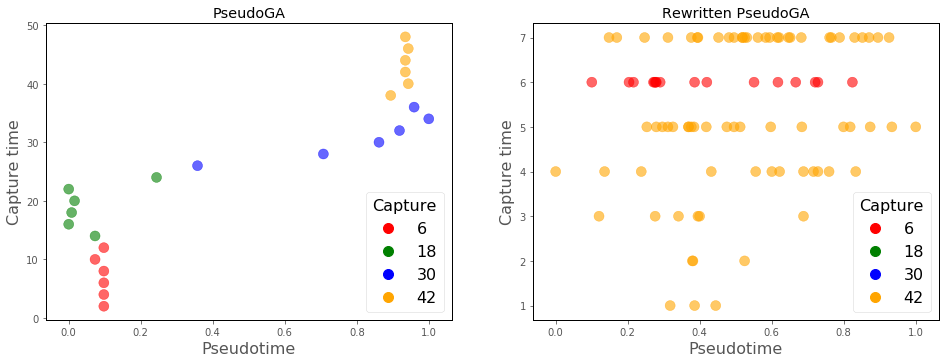

In [698]:
mdata = pd.read_csv('WindramMetaData.csv', index_col = [0])

actual_capture_time = mdata['capture.orig'].values
print(actual_capture_time)
pseudotime = list(Pseudotime)

pseudotime_pseudoGA = [0.097560976, 0.097560976, 0.097560976 ,
                        0.097560976, 0.073170732 ,0.097560976, 
                        0.073170732, 0.000000000 ,0.008130081,
                        0.016260163, 0.000000000, 0.243902439 ,
                        0.357723577, 0.707317073 ,0.861788618 ,
                        0.918699187, 1.000000000 ,0.959349593 ,
                        0.894308943, 0.943089431 ,0.934959350,
                        0.934959350, 0.943089431 ,0.934959350 ]
                        #0.926829268
pseudotime_pseudoGA = list(pseudotime_pseudoGA)
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16, 12))
plt.subplot(2, 2, 1)
plot('PseudoGA', 'Pseudotime', 'Capture time', pseudotime_pseudoGA, actual_capture_time, mdata['capture'].values)
plt.subplot(2, 2, 2)
plot('Rewritten PseudoGA', 'Pseudotime', 'Capture time', pseudotime,typeofCells, typeofCells)

In [602]:

typeofCells  = [1, 1, 1, 2 ,2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5 ,6 ,6 ,
6, 6 ,6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7,
7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


In [127]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import  numpy as np
import  pandas as pd
from collections import OrderedDict
from cycler import cycler
import warnings
warnings.filterwarnings('ignore')

matplotlib.style.use('ggplot')
matplotlib.rcParams['axes.facecolor'] = 'white'
matplotlib.rcParams['axes.edgecolor'] = 'black'
# plt.rc('axes', color_cycle=['royalblue', 'orange', 'green', 'red', 'blueviolet', 'sienna', 'hotpink', 'gray', 'y', 'c'])
# plt.rc('axes', color_cycle=['royalblue', 'green', 'sienna', 'c', 'orange', 'red', 'blueviolet', 'hotpink', 'gray', 'y'])
plt.rc('axes', prop_cycle=cycler(color=['royalblue', 'green', 'sienna', 'c', 'orange', 'red', 'blueviolet', 'hotpink', 'gray', 'y']))
# axes.prop_cycle : cycler('color', ['b', 'g', 'r', 'c', 'm', 'y', 'k'])


def plot(title, xLabel, yLabel, xData, yData, cpt, xErr=None, **kwargs):
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = 'black'
    # plt.figure(figsize=(8, 6))
    plt.title( '%s' % ( title ) )
    plt.xlabel('%s' % (xLabel), fontsize=16)
    plt.ylabel('%s' % (yLabel), fontsize=16)

    cellCapture = OrderedDict((('6', 'red'), ('18', 'green'), ('30', 'blue'), ('42', 'orange')))
    color_map = [0 for i in range(len(cpt))]

    for i in range(0, len(cpt)):
        if cpt[i] == 6:
            color_map[i] = 'red'
        elif cpt[i] == 18:
            color_map[i] = 'green'
        elif cpt[i] == 30:
            color_map[i] = 'blue'
        else:
            color_map[i] = 'orange'

    if 'datset' in kwargs:
        cellCapture = OrderedDict((('0', 'red'), ('2', 'green'), ('4', 'blue'), ('7', 'orange')))
        for i in range(0, len(cpt)):
            if cpt[i] == 1:
                color_map[i] = 'red'
            elif cpt[i] == 2:
                color_map[i] = 'green'
            elif cpt[i] == 3:
                color_map[i] = 'blue'
            else:
                color_map[i] = 'orange'

    # print(cellCapture)
    markers = [plt.Line2D([0, 0], [0, 0], color=color, marker='o', ms=10, linestyle='') for color in cellCapture.values()]

    plt.scatter(xData, yData, 100, c=color_map, alpha=0.6)
    if xErr is not None:
        plt.errorbar(xData, yData, xerr=xErr, fmt='none', marker='none', ecolor=color_map)

    # l = plt.legend(markers, cellCapture.keys(), numpoints=1, title='Capture', bbox_to_anchor=(1.1, 0.5), loc=10, fontsize=16)
    l = plt.legend(markers, cellCapture.keys(), numpoints=1, title='Capture', loc=4, fontsize=16)
    plt.setp(l.get_title(), fontsize=16)
    # plt.show()
